In [1]:
# Importing essential libraries:

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, warnings

warnings.filterwarnings('ignore') # Suppress warnings for better readability

In [2]:
# Load the lending data from a CSV file

df = pd.read_csv("loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Check the shape of the loaded dataset

df.shape

(39717, 111)

In [4]:
# Inspect the data types of each column in the dataset

df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [5]:
# Calculate the number of missing values for each column

df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
# Load the data dictionary for reference

terminology = pd.read_excel("Data_Dictionary.xlsx")
terminology.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [7]:
# Display the data dictionary overview

terminology

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


## 1. DATA CLEANING

In [9]:
# Calculating the total number of rows in the DataFrame

total_rows = len(df)
total_rows

39717

In [10]:
# Counting the occurrences of each unique value in the "loan_status" column of the DataFrame

df["loan_status"].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

##### Dropping rows where 'loan_status' is 'Current' as these loans are still in progress and do not provide conclusive evidence about whether the customer will default or pay in the future.


In [12]:
# Updating the DataFrame `df` to exclude such rows.

df = df[df["loan_status"] != "Current"]

In [13]:
# The total number rows check

print(df.shape)

(38577, 111)


In [14]:
# Calculating the percentage of rows removed after filtering 'Current' loan statuses
perc_rows_deleted = (((total_rows - len(df))*100)/total_rows)

# Printing the percentage of rows removed, rounded to two decimal places for readability.
print("The % of the rows got removed is {}".format(round(perc_rows_deleted,2)))

The % of the rows got removed is 2.87


In [15]:
# Count the number of duplicate rows in the DataFrame `df`.  
duplicate_rows = len(df[df.duplicated()])

# Print the total number of duplicate rows found.
print("The no. of Rows duplicated are {}".format(duplicate_rows))

The no. of Rows duplicated are 0


In [16]:
# The total number rows check
print(df.shape)

(38577, 111)


In [17]:
# Calculate the percentage of missing (null) values for each column in the DataFrame.  
(df.isnull().sum()*100)/len(df)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

##### As several columns contain null values, which could affect the analysis, we will explore methods to remove these columns from the dataset.

In [19]:
# Removing columns with all null values as they do not contribute to the analysis.
# Identifying and listing such columns for better transparency.

# Get the list of columns with all null values
na_columns = df.columns[df.isna().all()]

# Print the number of columns with all null values
print(f"Number of columns with all null values: {len(na_columns)}")

# Display the columns with all null values
print("Columns with all null values:", na_columns)

Number of columns with all null values: 55
Columns with all null values: Index(['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',

In [20]:
# Remove the identified columns from the DataFrame
df.drop(na_columns, axis=1, inplace=True)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [21]:
# Identifying columns that have unique values across the entire dataset.
# These columns may not provide meaningful insights for analysis as each row has a distinct value.

# Get the list of columns with unique values
unique_columns = [col for col in df.columns if df[col].nunique() == len(df)]

# Display the columns with unique values
unique_columns

['id', 'member_id', 'url']

In [22]:
# Removing 'member_id' and 'url' columns as they contain unique values that are not needed for the exploratory data analysis (EDA).
# We will use the 'id' column as the unique identifier for further analysis.

df.drop(['member_id', 'url'], axis=1, inplace=True)

In [23]:
df.shape

(38577, 54)

In [24]:
# Removing 'desc' and 'title' columns as they contain text descriptions that do not contribute to the exploratory data analysis (EDA).
# Displaying the updated shape of the DataFrame after dropping the columns.

df.drop(['desc', 'title'], axis=1, inplace=True)
df.shape

(38577, 52)

In [25]:
# Limiting the analysis to the group level by removing the 'sub_grade' column, which is a sub-level detail.
# Displaying the updated shape of the DataFrame after dropping the column.

df.drop(['sub_grade'], axis=1, inplace=True)
df.shape

(38577, 51)

In [26]:
# Removing behavioural data columns that are captured post loan approval and are unavailable during the loan approval process.
# This ensures the dataset contains only relevant features for loan approval analysis.

behavioural_columns = ['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt', 'inq_last_6mths', 
                       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                       'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                       'application_type', 'last_pymnt_d', 'last_credit_pull_d']

df.drop(behavioural_columns, axis=1, inplace=True)
df.shape

(38577, 30)

In [27]:
# Displaying the number of unique values in each column of the dataset, sorted in ascending order.
# This helps to identify columns with low variability or constant values.

df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
funded_amnt_inv                8050
installment                 

In [28]:
# Identifying and removing columns that have only one unique value, as they provide no variation for analysis.
# These columns are not useful for further analysis.

for col in df.columns:
    if df[col].nunique(dropna=True) == 1:
        print(f"Removing column: {col}")
        df.drop(col, axis=1, inplace=True)

# Display the updated DataFrame after removing columns with a single unique value.
print("Updated DataFrame after removing columns with one unique value:")
df

Removing column: pymnt_plan
Removing column: initial_list_status
Removing column: collections_12_mths_ex_med
Removing column: policy_code
Removing column: acc_now_delinq
Removing column: chargeoff_within_12_mths
Removing column: delinq_amnt
Removing column: tax_liens
Updated DataFrame after removing columns with one unique value:


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,...,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,NaN,NaN,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,...,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,NaN,NaN,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,...,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,NaN,NaN,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,...,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,35.0,NaN,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,...,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,FiSite Research,4 years,...,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,0.0,0.0,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,"Squarewave Solutions, Ltd.",3 years,...,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,5.0,0.0,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,NaN,< 1 year,...,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,0.0,0.0,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,NaN,< 1 year,...,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,0.0,0.0,NaN


In [29]:
# Dropping the columns which has more than 50% values as NULL

total_rows = len(df)
for col in df.columns:
    if df[col].isna().mean().round(2) >= 0.50:
        print(col)
        df.drop(col, axis=1, inplace=True)
print("New DF after removing :")
df

mths_since_last_delinq
mths_since_last_record
New DF after removing :


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,NaN


In [30]:
# Removing the 'emp_title' column, as it contains textual data that is not relevant for the exploratory data analysis (EDA).
# Displaying the updated shape of the DataFrame after dropping the column.

df.drop(['emp_title'], axis=1, inplace=True)
print(df.shape)

(38577, 19)


## 2. DATA CONVERSION

In [32]:
# Displaying the data types of each column in the DataFrame to check the type of data stored in each column.
df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [33]:
# Counting the occurrences of each unique value in the 'term' column to analyze the distribution of loan terms in the dataset.
df.term.value_counts()

term
36 months    29096
60 months     9481
Name: count, dtype: int64

In [34]:
# Converting the 'term' column from string to integer by removing the last 7 characters (' months') and converting the remaining value to an integer.
# This ensures 'term' is in a numeric format for further analysis.

def clean_term(val):
    return int(val[:-7])

df['term'] = df['term'].apply(clean_term)

# Verifying the data type of 'term' after conversion
print(df['term'].dtype)

# Displaying the updated 'term' column
df['term']

int64


0        36
1        60
2        36
3        36
5        36
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 38577, dtype: int64

In [35]:
# Counting the occurrences of each unique value in the 'term' column after converting it to an integer format.
# This helps analyze the distribution of loan terms in the dataset.
df['term'].value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [36]:
# Counting the occurrences of each unique value in the 'int_rate' column to analyze the distribution of interest rates in the dataset.
df['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [37]:
# Converting the 'int_rate' column from string to float by removing the '%' symbol and converting the remaining value to a float.
# This ensures 'int_rate' is in a numeric format for further analysis.

def clean_int_rate(val):
    return float(val[:-1])

df['int_rate'] = df['int_rate'].apply(clean_int_rate)

# Verifying the data type of 'int_rate' after conversion
print(df['int_rate'].dtype)

# Displaying the updated 'int_rate' column
df['int_rate']

float64


0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64

In [38]:
# Converting the 'loan_amnt' and 'funded_amnt' columns to float64 data type to ensure they are in numeric format for further analysis.

df = df.astype({'loan_amnt': 'float', 'funded_amnt': 'float'})

# Displaying the updated DataFrame after conversion
df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500.0,2500.0,1075.0,36,8.07,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,NaN
39713,90665,8500.0,8500.0,875.0,36,10.28,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,NaN
39714,90395,5000.0,5000.0,1325.0,36,8.07,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,NaN
39715,90376,5000.0,5000.0,650.0,36,7.43,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,NaN


In [39]:
# Checking the unique values and their counts in the 'grade' column to analyze its distribution.
df['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [40]:
# Checking the unique values and their counts in the 'emp_length' column to analyze its distribution.

df['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [41]:
# Printing the updated counts of unique values in the 'emp_length' column after removing the unnecessary strings.
print(df['emp_length'].value_counts())

# Displaying the updated 'emp_length' column to verify the changes.
df['emp_length']

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64


0        10+ years
1         < 1 year
2        10+ years
3        10+ years
5          3 years
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 38577, dtype: object

In [42]:
# Rounding the specified columns to two decimal points for better readability and precision in analysis.

for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    df[col] = df[col].apply(lambda x: round(x, 2))
    print(df[col])  # Displaying the updated column after rounding

0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: loan_amnt, Length: 38577, dtype: float64
0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: funded_amnt, Length: 38577, dtype: float64
0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 38577, dtype: float64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
    

In [43]:
# Converting the 'issue_d' column to datetime format using the specified format '%b-%y' (e.g., Jan-21).
# This ensures that 'issue_d' is in a proper datetime format for time-based analysis.

df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

# Displaying the updated 'issue_d' column to verify the conversion.
df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [44]:
# Checking the number of null values in each column of the DataFrame to identify any remaining missing data.

df.isnull().sum()

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

## 3. DROPPING / IMPUTING THE ROWS

In [46]:
# Dropping rows where null values are present in the 'emp_length' and 'pub_rec_bankruptcies' columns,
# as these columns are essential for further analysis.

prev_rows = len(df)  # Storing the previous number of rows before dropping
print(f"Previous number of rows: {prev_rows}")

# Removing rows with null values in 'emp_length' and 'pub_rec_bankruptcies'
df = df[df['emp_length'].notna()]
df = df[df['pub_rec_bankruptcies'].notna()]

# Displaying the DataFrame after removing rows with null values in these columns.

Previous number of rows: 38577


In [47]:
# Calculating and printing the percentage of rows that were removed after dropping rows with null values in 'emp_length' and 'pub_rec_bankruptcies'.

after_rows = len(df)  # Storing the number of rows after dropping
percent_rows = ((prev_rows - after_rows) * 100 / prev_rows)  # Calculating the percentage of rows removed

print("The percentage of rows removed is:", round(percent_rows, 2))

The percentage of rows removed is: 4.48


In [48]:
# Verifying that there are no remaining null values in the DataFrame after cleaning and dropping rows with nulls in specified columns.

df.isnull().sum()

id                      0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

In [49]:
# Checking the count of unique values in the 'emp_length' column to verify the distribution of employment lengths.

df['emp_length'].value_counts()

emp_length
10+ years    8369
< 1 year     4341
2 years      4207
3 years      3951
4 years      3297
5 years      3161
1 year       3077
6 years      2136
7 years      1689
8 years      1410
9 years      1209
Name: count, dtype: int64

In [50]:
# Cleaning the 'emp_length' column by stripping unnecessary strings (like 'years', 'year', '<', ' ', '+') to retain only numeric values.

def clean_emp_length(x):
    x = x.strip("years")
    x = x.strip("year")
    x = x.strip("<")
    x = x.replace(" ", "")
    x = x.replace("+", "")
    return x

df['emp_length'] = df['emp_length'].apply(clean_emp_length)

In [51]:
# Verifying the cleaned 'emp_length' column by checking the count of unique values after removing unnecessary strings.

df['emp_length'].value_counts()

emp_length
10    8369
1     7418
2     4207
3     3951
4     3297
5     3161
6     2136
7     1689
8     1410
9     1209
Name: count, dtype: int64

In [52]:
# Displaying the entire 'emp_length' column to verify the cleaned values after processing.

print(df['emp_length'])

0        10
1         1
2        10
3        10
5         3
         ..
39562     1
39573     3
39623     8
39666     2
39680     2
Name: emp_length, Length: 36847, dtype: object


## 4. DERIVED COLUMNS

In [54]:
# Creating derived columns for 'issue_year' and 'issue_month' by extracting the year and month from the 'issue_d' column.

df['issue_year'] = pd.DatetimeIndex(df['issue_d']).year
df['issue_month'] = pd.DatetimeIndex(df['issue_d']).month

(36847, 21)
count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


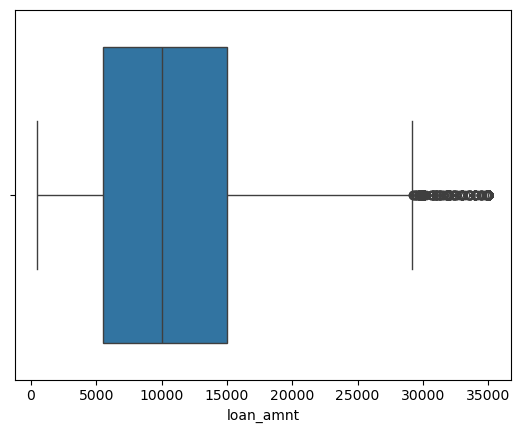

In [55]:
# Analyzing the 'loan_amnt' column by checking the shape, statistical summary, and visualizing the distribution using a boxplot.

print(df.shape)
print(df["loan_amnt"].describe())

# Visualizing the loan amount distribution using a boxplot with seaborn for better aesthetics.
sns.boxplot(x=df['loan_amnt'])
plt.show()

## 5. UNIVARIATE ANALYSIS

In [57]:
# Defining a dictionary for column metadata (titles) used in the functions below for better readability and understanding.

column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annual Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

##### Bucketing different variables (e.g., loan amount, annual income, interest rate, etc.) into predefined bins for better categorization and analysis.
##### This approach helps in grouping continuous variables into discrete categories, making it easier to observe trends and patterns.


In [59]:
# Bucketing the 'loan_amnt' variable into predefined categories based on loan amounts for easier analysis of loan distribution.

def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # Lower range (25% quartile)
    elif (column > 5000) and (column <= 10000):
        return '5K - 10K'
    elif (column > 10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above'  # Higher range (75% quartile)

# Applying the bucket_loan_amnt function to the 'loan_amnt' column and creating a new 'loan_amnt_b' column for the bucketed values.
df['loan_amnt_b'] = df.apply(lambda x: bucket_loan_amnt(x['loan_amnt']), axis=1)

In [60]:
# Bucketing the 'annual_inc' variable into predefined categories based on annual income for easier analysis of income distribution.

def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k'  # Lower range (25% quartile)
    elif (column > 40000) and (column <= 50000):
        return '40k - 50k'
    elif (column > 50000) and (column <= 60000):
        return '50k to 60k'
    elif (column > 60000) and (column <= 70000):
        return '60k to 70k'
    elif (column > 70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above'  # Higher range (75% quartile)

# Applying the bucket_annual_inc function to the 'annual_inc' column and creating a new 'annual_inc_b' column for the bucketed values.
df['annual_inc_b'] = df.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis=1)

In [61]:
# Bucketing the 'int_rate' variable into categories based on interest rates for better understanding of loan terms and conditions.

def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low'  # Lower range (25% quartile)
    elif (column > 9) and (column <= 11):
        return 'Low'
    elif (column > 11) and (column <= 13):
        return 'Moderate'
    elif (column > 13) and (column <= 15):
        return 'High'
    else:
        return 'Very High'  # Higher range (75% quartile)

# Applying the bucket_int_rate function to the 'int_rate' column and creating a new 'int_rate_b' column for the bucketed values.
df['int_rate_b'] = df.apply(lambda x: bucket_int_rate(x.int_rate), axis=1)

In [62]:
# Bucketing the 'dti' (Debt to Income Ratio) variable into categories for easier analysis of debt burden levels.

def bucket_dti(column):
    if column <= 8:
        return 'Very Low'  # Lower range (25% quartile)
    elif (column > 8) and (column <= 12):
        return 'Low'
    elif (column > 12) and (column <= 16):
        return 'Moderate'
    elif (column > 16) and (column <= 20):
        return 'High'
    else:
        return 'Very High'  # Higher range (75% quartile)

# Applying the bucket_dti function to the 'dti' column and creating a new 'dti_b' column for the bucketed values.
df['dti_b'] = df.apply(lambda x: bucket_dti(x.dti), axis=1)

In [63]:
# Function to plot both the distribution and boxplot for univariate analysis of a given column.
# Provides a clear view of the data distribution and the presence of outliers.

def plot_diagram(df, column):
    # Creating a figure with two subplots: one for the distribution and one for the boxplot
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Adjusted figsize for better layout
    sns.histplot(df[column].dropna(), kde=True, ax=axes[0], color='skyblue', bins=30)  # Distribution with KDE and histogram
    sns.boxplot(x=df[column], ax=axes[1], color='lightgreen')  # Boxplot with light green color for visual appeal

    # Adding labels and titles for better readability
    axes[0].set_xlabel(column_titles[column], fontsize=12)
    axes[0].set_title(f'Distribution of {column_titles[column]}', fontsize=14)
    axes[1].set_xlabel(column_titles[column], fontsize=12)
    axes[1].set_title(f'Boxplot of {column_titles[column]}', fontsize=14)

    # Enhancing the overall layout for a cleaner look
    plt.tight_layout()
    plt.show()

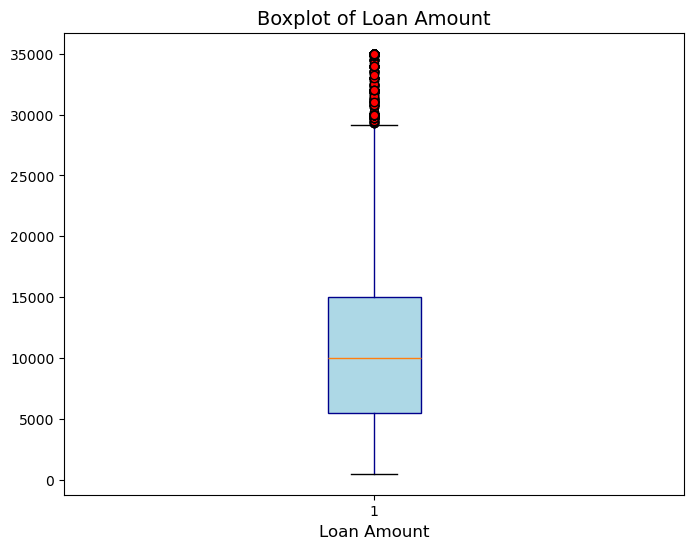

In [64]:
# Plotting the boxplot for the 'loan_amnt' column to visualize the distribution and potential outliers.

plt.figure(figsize=(8, 6))  # Adjusting figure size for better visualization
plt.boxplot(df['loan_amnt'], patch_artist=True, boxprops=dict(facecolor='lightblue', color='darkblue'),
            whiskerprops=dict(color='darkblue'), flierprops=dict(markerfacecolor='red', marker='o'))
plt.title('Boxplot of Loan Amount', fontsize=14)
plt.xlabel('Loan Amount', fontsize=12)
plt.show()

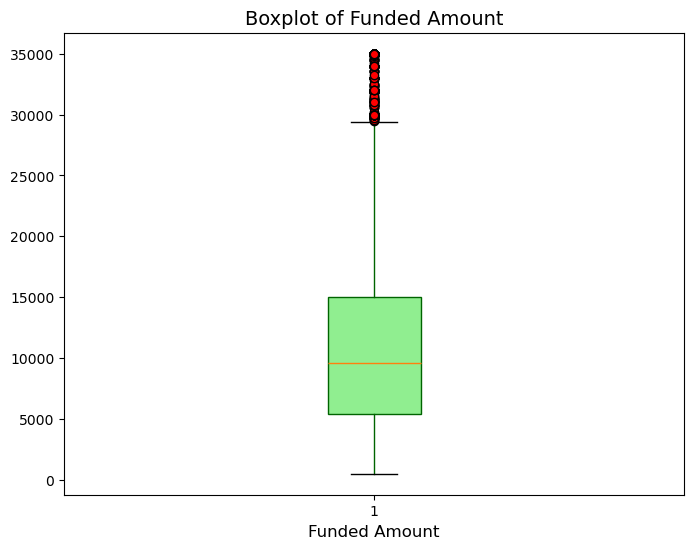

In [65]:
# Plotting the boxplot for the 'funded_amnt' column to visualize its distribution and identify any outliers.

plt.figure(figsize=(8, 6))  # Adjusting figure size for better visualization
plt.boxplot(df['funded_amnt'], patch_artist=True, boxprops=dict(facecolor='lightgreen', color='darkgreen'),
            whiskerprops=dict(color='darkgreen'), flierprops=dict(markerfacecolor='red', marker='o'))
plt.title('Boxplot of Funded Amount', fontsize=14)
plt.xlabel('Funded Amount', fontsize=12)
plt.show()

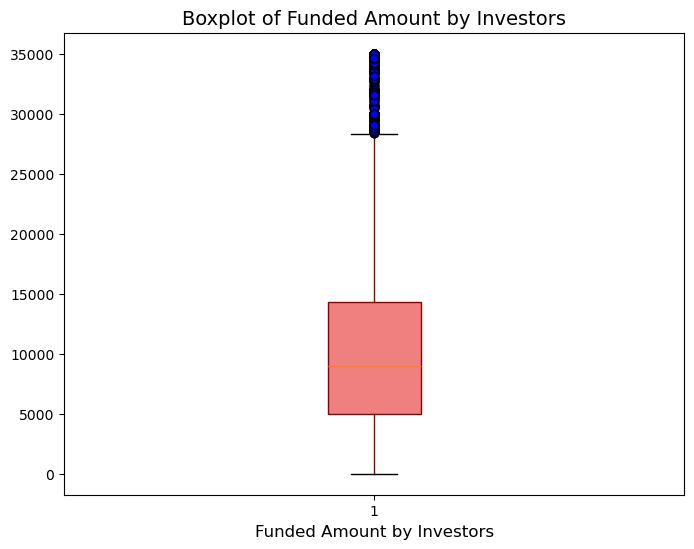

In [66]:
# Plotting the boxplot for the 'funded_amnt_inv' column to analyze the distribution and potential outliers.

plt.figure(figsize=(8, 6))  # Adjusting figure size for better visualization
plt.boxplot(df['funded_amnt_inv'], patch_artist=True, boxprops=dict(facecolor='lightcoral', color='darkred'),
            whiskerprops=dict(color='darkred'), flierprops=dict(markerfacecolor='blue', marker='o'))
plt.title('Boxplot of Funded Amount by Investors', fontsize=14)
plt.xlabel('Funded Amount by Investors', fontsize=12)
plt.show()

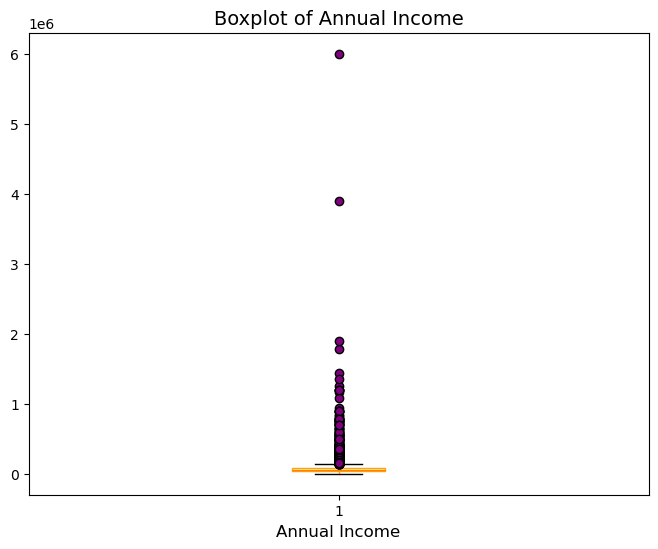

In [67]:
# Plotting the boxplot for the 'annual_inc' column to assess the distribution and detect any outliers.

plt.figure(figsize=(8, 6))  # Adjusting figure size for better visualization
plt.boxplot(df['annual_inc'], patch_artist=True, boxprops=dict(facecolor='lightyellow', color='orange'),
            whiskerprops=dict(color='orange'), flierprops=dict(markerfacecolor='purple', marker='o'))
plt.title('Boxplot of Annual Income', fontsize=14)
plt.xlabel('Annual Income', fontsize=12)
plt.show()

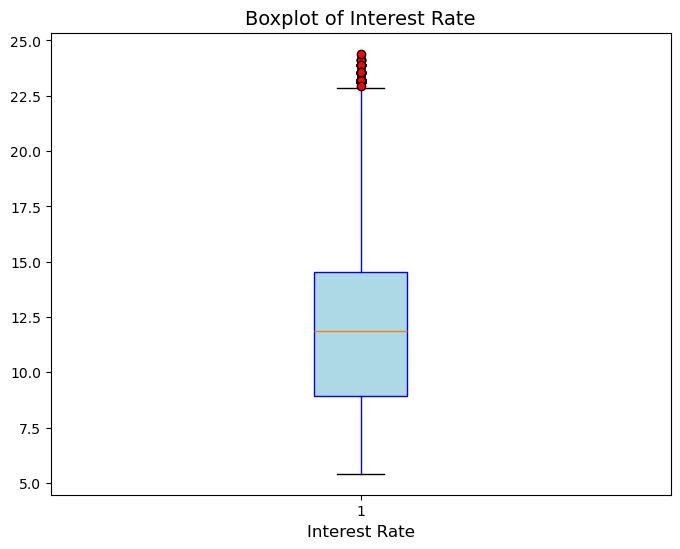

In [68]:
# Plotting the boxplot for the 'int_rate' column to observe its distribution and identify any potential outliers.

plt.figure(figsize=(8, 6))  # Adjusting figure size for better visualization
plt.boxplot(df['int_rate'], patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'), flierprops=dict(markerfacecolor='red', marker='o'))
plt.title('Boxplot of Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=12)
plt.show()

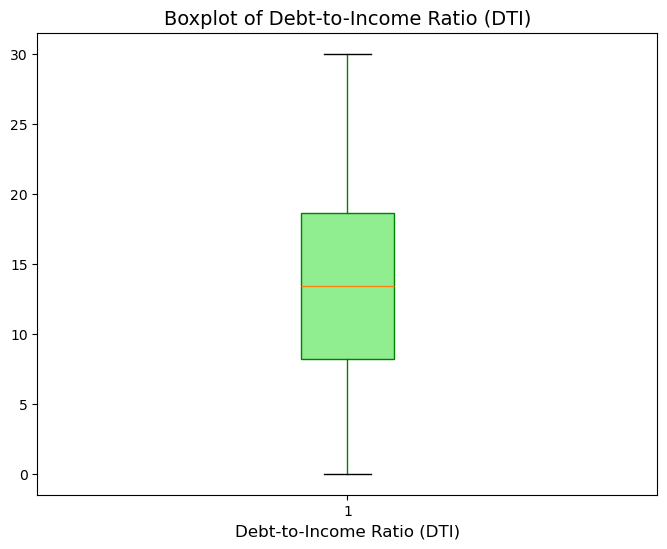

In [69]:
# Plotting the boxplot for the 'dti' (Debt-to-Income Ratio) column to analyze its distribution and detect any outliers.

plt.figure(figsize=(8, 6))  # Adjusting figure size for better visualization
plt.boxplot(df['dti'], patch_artist=True, boxprops=dict(facecolor='lightgreen', color='green'),
            whiskerprops=dict(color='green'), flierprops=dict(markerfacecolor='orange', marker='o'))
plt.title('Boxplot of Debt-to-Income Ratio (DTI)', fontsize=14)
plt.xlabel('Debt-to-Income Ratio (DTI)', fontsize=12)
plt.show()

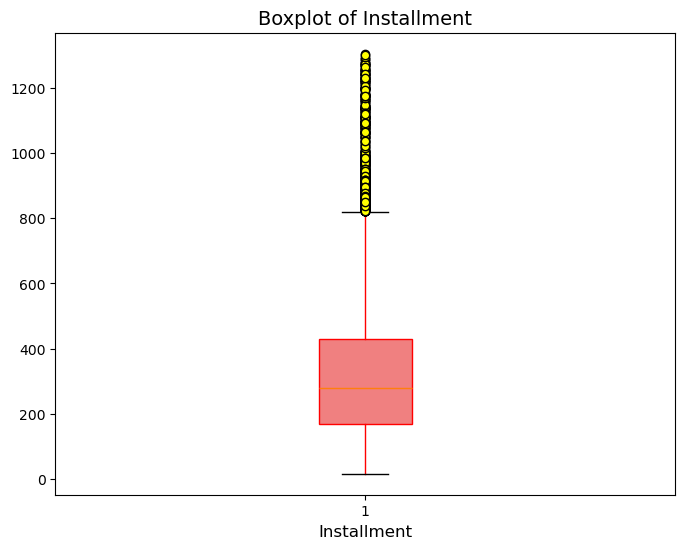

In [70]:
# Plotting the boxplot for the 'installment' column to visualize its distribution and detect any outliers.

plt.figure(figsize=(8, 6))  # Adjusting figure size for better visualization
plt.boxplot(df['installment'], patch_artist=True, boxprops=dict(facecolor='lightcoral', color='red'),
            whiskerprops=dict(color='red'), flierprops=dict(markerfacecolor='yellow', marker='o'))
plt.title('Boxplot of Installment', fontsize=14)
plt.xlabel('Installment', fontsize=12)
plt.show()

In [71]:
# Removing outliers from specified columns using the IQR method

# Outliers are detected and removed from two sets of columns based on the IQR (Interquartile Range) method.

outliers_columns_set1 = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']  # Set 1
outliers_columns_set2 = ['int_rate', 'installment', 'annual_inc']  # Set 2

# Function to remove outliers based on IQR threshold
def remove_outliers_iqr(data, columns, threshold=1.5):
    for col in columns:
        Q1 = data[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = data[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR  # Lower bound for outlier detection
        upper_bound = Q3 + threshold * IQR  # Upper bound for outlier detection
        
        # Removing rows where values are outside the bounds
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Apply the function to remove outliers
df = remove_outliers_iqr(df, outliers_columns_set1, 1.5)
df = remove_outliers_iqr(df, outliers_columns_set2, 1.5)

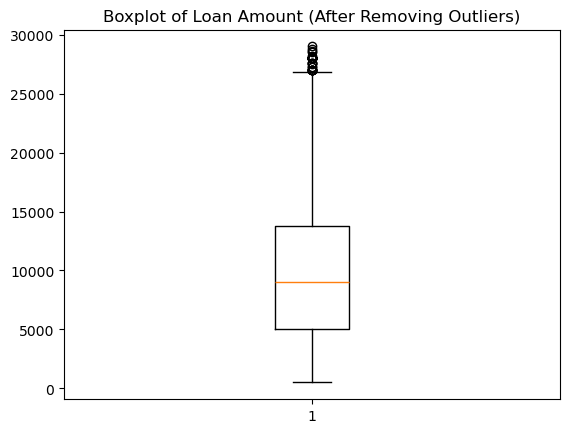

In [72]:
plt.boxplot(df['loan_amnt'])
plt.title('Boxplot of Loan Amount (After Removing Outliers)')
plt.show()

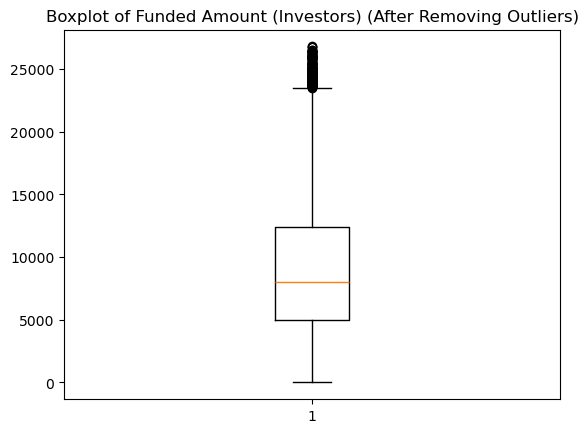

In [73]:
plt.boxplot(df['funded_amnt_inv'])
plt.title('Boxplot of Funded Amount (Investors) (After Removing Outliers)')
plt.show()

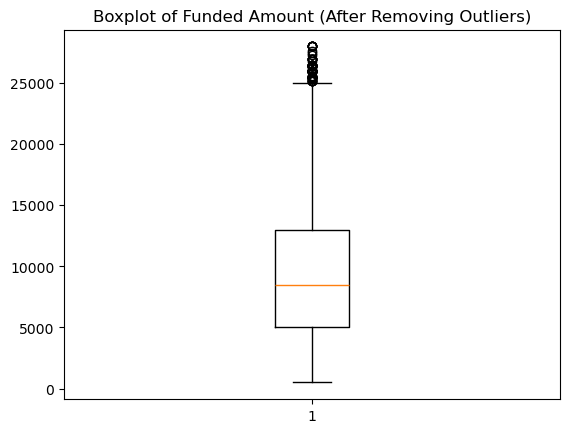

In [74]:
plt.boxplot(df['funded_amnt'])
plt.title('Boxplot of Funded Amount (After Removing Outliers)')
plt.show()

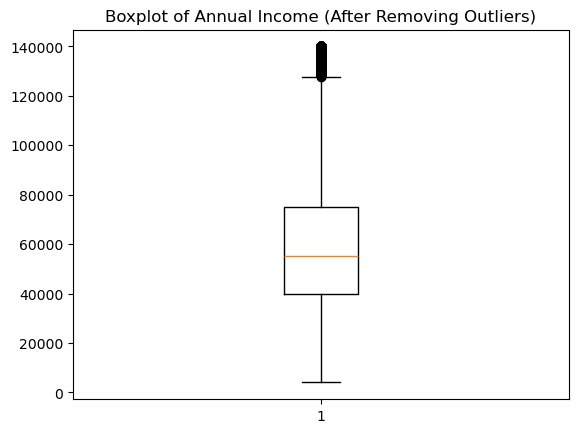

In [75]:
plt.boxplot(df['annual_inc'])
plt.title('Boxplot of Annual Income (After Removing Outliers)')
plt.show()

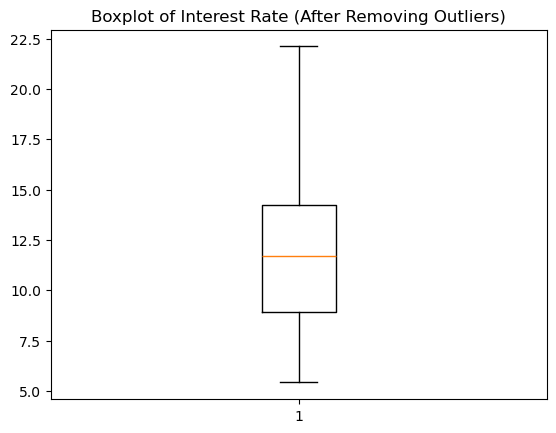

In [76]:
plt.boxplot(df['int_rate'])
plt.title('Boxplot of Interest Rate (After Removing Outliers)')
plt.show()

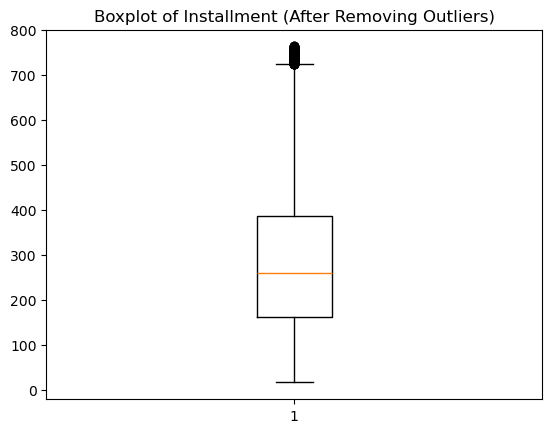

In [77]:
plt.boxplot(df['installment'])
plt.title('Boxplot of Installment (After Removing Outliers)')
plt.show()

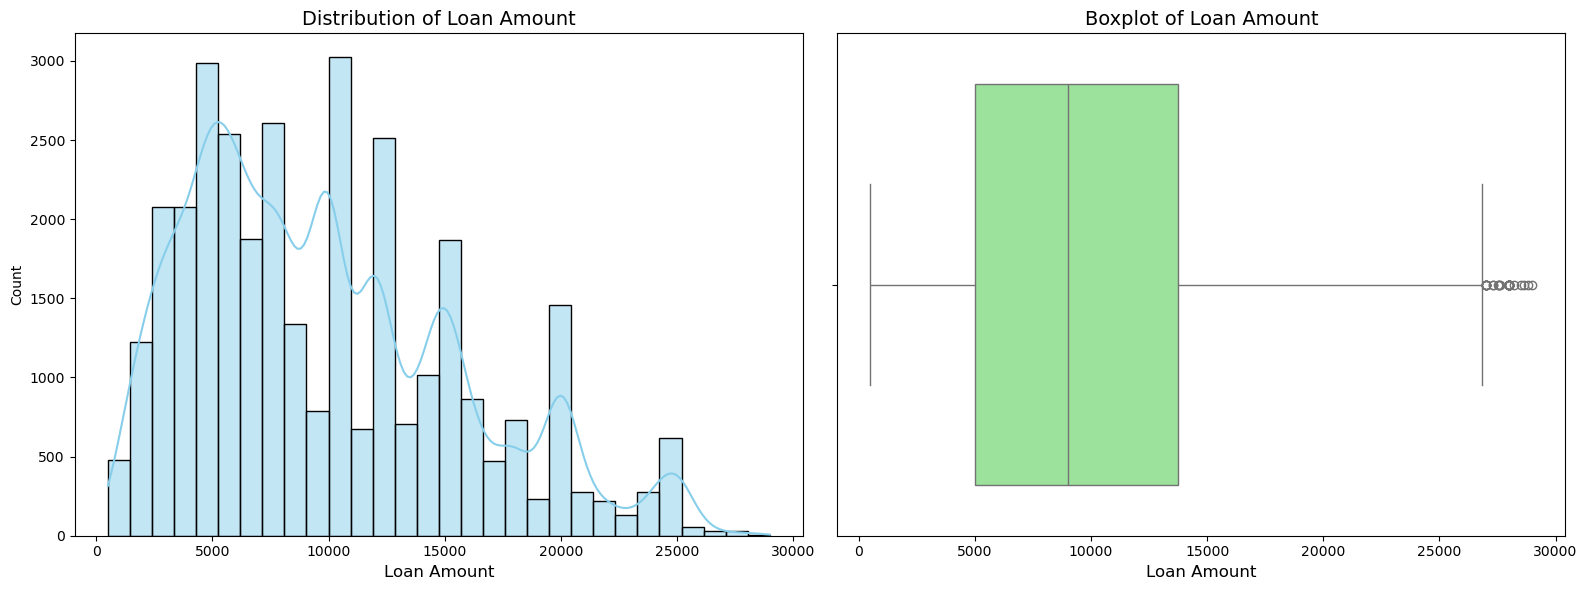

count    33191.000000
mean      9820.838480
std       5809.600807
min        500.000000
25%       5000.000000
50%       9000.000000
75%      13750.000000
max      29000.000000
Name: loan_amnt, dtype: float64

In [78]:
# Plotting the distribution and boxplot for loan_amnt
plot_diagram(df, 'loan_amnt')

# Describing the Loan Amount
df['loan_amnt'].describe()

#### **Observation:**
##### 1. Most loan applications have loan amounts in the range of **5k to 14k**, which indicates that the majority of borrowers prefer smaller loan amounts within this bracket.
##### 2. The **maximum loan amount** applied for is around **29k**, which stands out as an outlier compared to the general distribution of loan amounts.

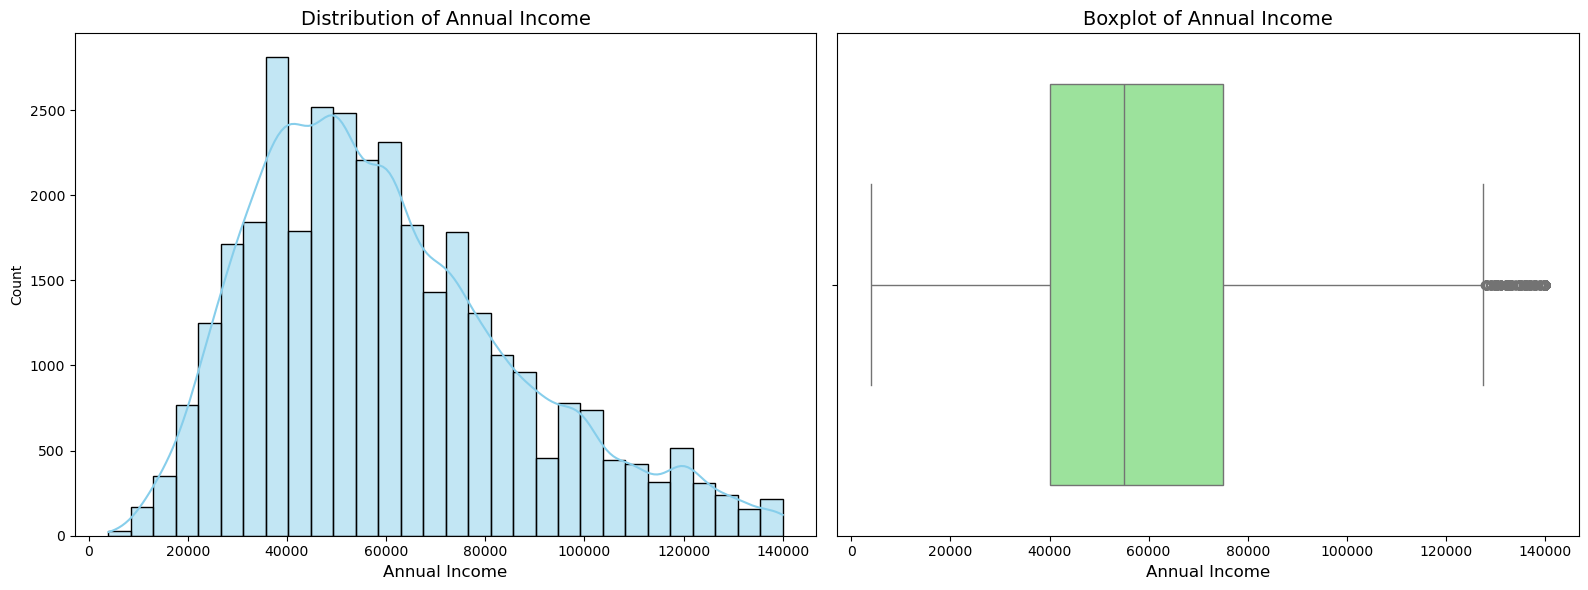

count     33191.000000
mean      59883.284700
std       26916.857415
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [80]:
# Visualizing the distribution and statistical summary of the 'annual_inc' column

plot_diagram(df, 'annual_inc')

# Statistical Summary of 'annual_inc'
df['annual_inc'].describe()

In [81]:
# The Annual income of most of the applicants lies between 40k-75k.

# Calculate the average annual income
print("Average Annual Income is:", round(df['annual_inc'].mean(), 0))


Average Annual Income is: 59883.0


#### **Observation:**
##### 1. The majority of applicants' **annual incomes fall between 40k and 75k**, as seen from the distribution.
##### 2. The **average annual income** across all applicants is approximately **$59,883**, indicating a central tendency towards a middle-income range.
##### 3. A larger proportion of applicants have incomes close to or slightly below the average, with a few outliers on both lower and higher ends of the spectrum.

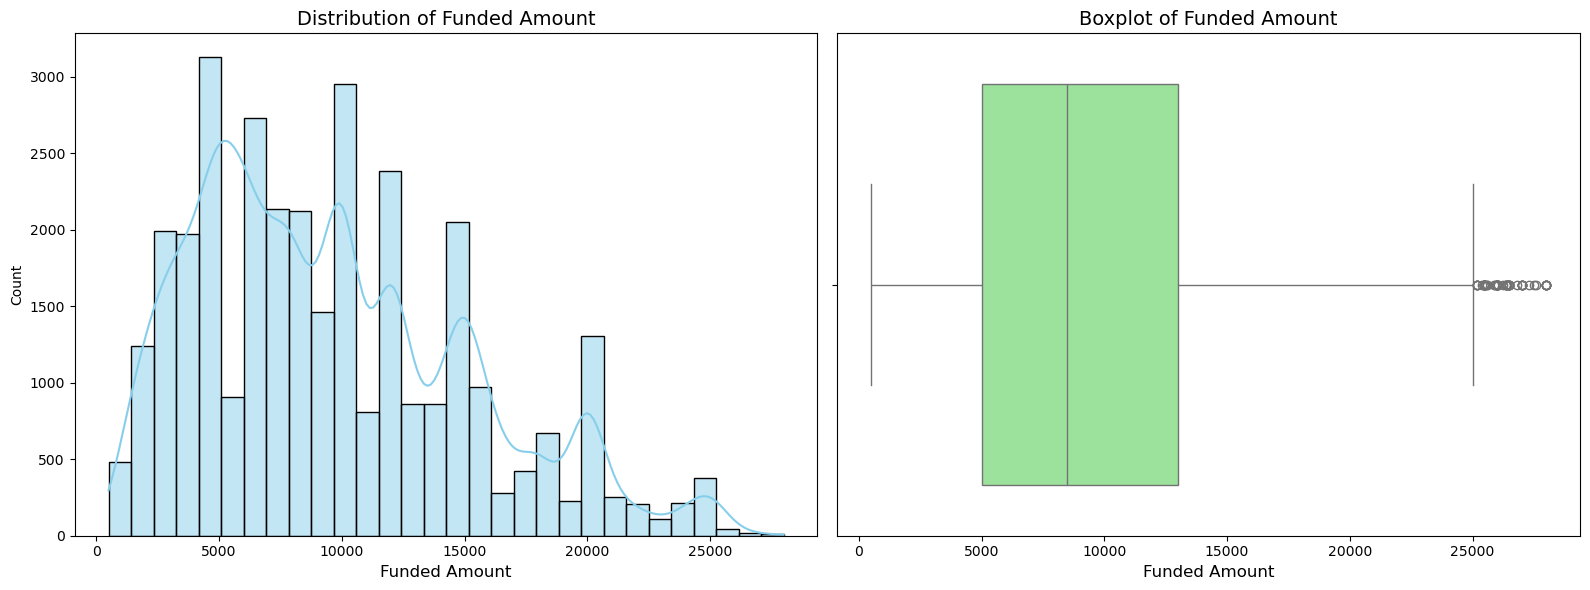

count    33191.000000
mean      9593.825887
std       5565.574327
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      28000.000000
Name: funded_amnt, dtype: float64

In [83]:
# Visualizing the distribution and statistical summary of the 'funded_amnt' column
plot_diagram(df, 'funded_amnt')

# Statistical Summary of 'funded_amnt'
df['funded_amnt'].describe()

#### **Observation:**
##### 1. Most of the funded amounts are concentrated between **5k-13k**, with the **mean funded amount** being around **9.6k**.
##### 2. The **maximum funded amount** reaches **28k**, indicating a few larger loans funded compared to the majority.

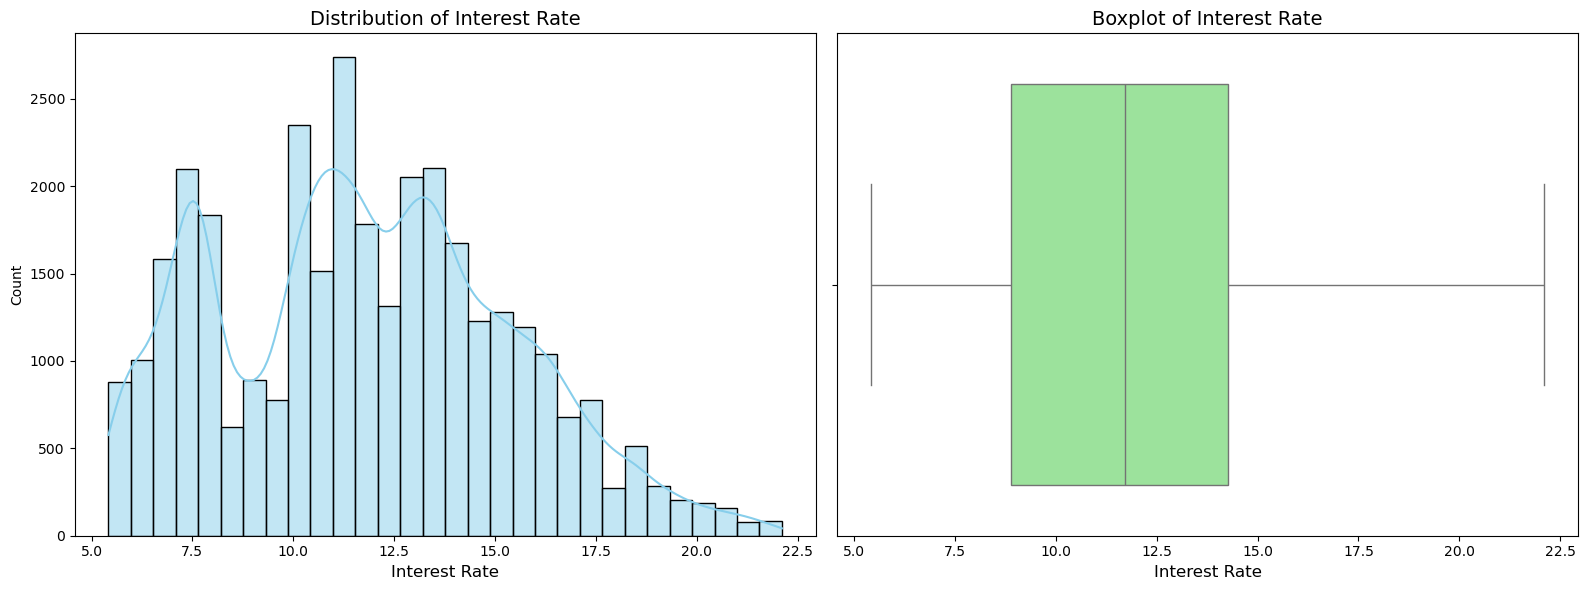

count    33191.000000
mean        11.782783
std          3.591944
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

In [85]:
# Visualizing the distribution and statistical summary of the 'int_rate' column
plot_diagram(df, 'int_rate')

# Statistical Summary of 'int_rate'
df['int_rate'].describe()

#### **Observations:**
##### 1. The majority of interest rates fall between 8.9% and 14.26%, with a mean interest rate of approximately 11.78%.
##### 2. The minimum interest rate is 5.42%, while the highest interest rate recorded is 22.11%.

### 5.2 UNORDERED CATEGORICAL VARAIBLE ANALYSIS

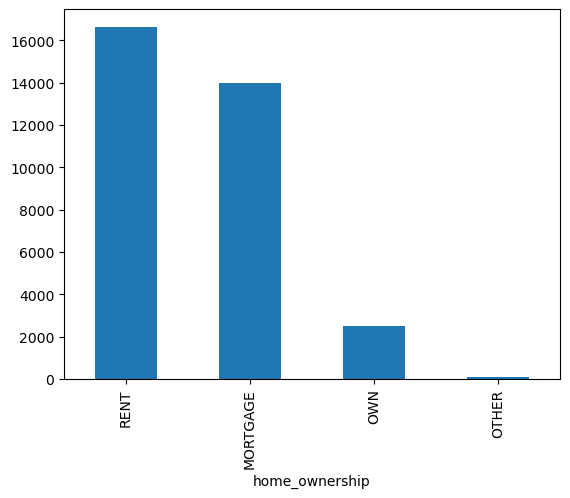

In [88]:
# Visualizing the distribution of the 'home_ownership' column using a bar chart
# This will show how many applicants have each type of home ownership status.

df['home_ownership'].value_counts().plot.bar()

# Display the plot
plt.show()

# The bar chart will display the count of applicants for each home ownership status 
# such as 'OWN', 'MORTGAGE', 'RENT', etc.

##### The majority of loan applicants are either renting or have a mortgage.

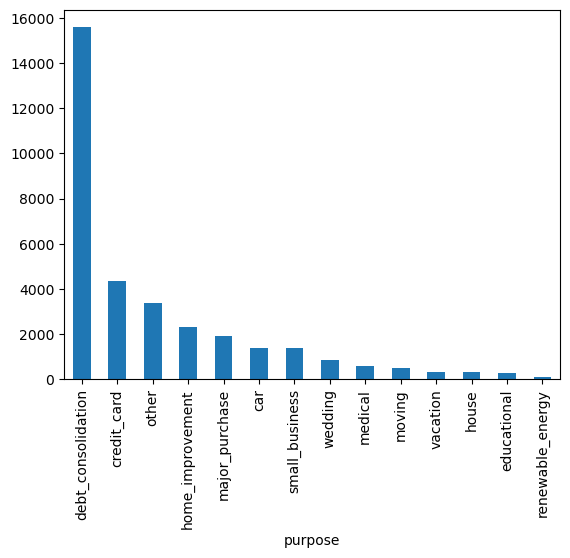

In [90]:
# Visualizing the distribution of the 'purpose' column using a bar chart
# This will show the count of loan applicants for each loan purpose.

df['purpose'].value_counts().plot.bar()

plt.show()

# The bar chart will display the count of applicants for each loan purpose, such as 'credit_card', 'debt_consolidation', 'home_improvement', etc.

##### The majority of loan applicants are seeking loans for debt consolidation.

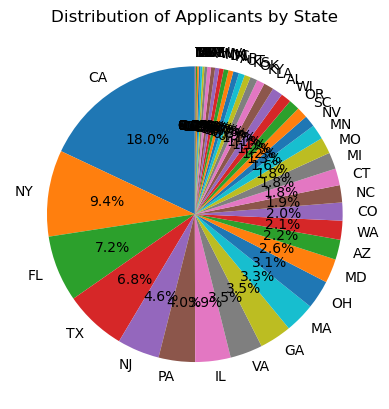

In [92]:
# Visualizing the distribution of applicants across states using a pie chart
# This will show the proportion of applicants from different states.

df['addr_state'].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.ylabel('')  # Removing y-axis label for better clarity
plt.title("Distribution of Applicants by State")
plt.show()

##### Most of the loan applicants are from California (CA), as indicated by the largest slice in the pie chart, reflecting the state with the highest number of applicants.

### 5.3 ORDERED CATEGORICAL VARIABLE ANALYSIS

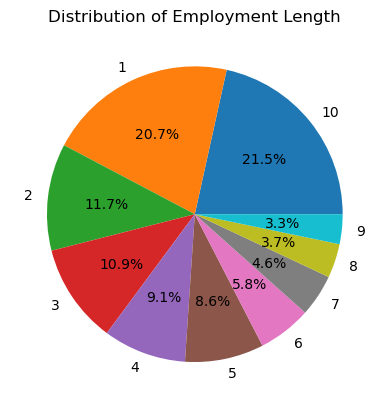

In [95]:
# Visualizing the distribution of employment length using a pie chart
# This will show how many applicants have each length of employment.

df['emp_length'].value_counts().plot(kind="pie", autopct='%1.1f%%')

plt.title("Distribution of Employment Length")
plt.ylabel("")  # Hide y-axis label for clarity
plt.show()

##### Most of the loan applications are from individuals with 10+ years of experience.

### 6. BIVARIATE ANALYSIS 

In [98]:
# Performing a Bivariate Analysis: Comparing Annual Income Bins against Loan Charge-off Proportion

# Grouping the dataset by 'annual_inc_b' (Annual Income Bins) and 'loan_status' to count the occurrences of each loan status
inc_range_vs_loan = df.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

# Calculating the total number of loans for each income bin (sum of 'Charged Off' and 'Fully Paid')
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid']

# Calculating the proportion of charged-off loans in each income bin
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']

# Sorting the dataframe by 'Chargedoff_Proportion' in descending order to identify the income bins with the highest charge-off rates
inc_range_vs_loan_sorted = inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Display the sorted results for analysis
inc_range_vs_loan_sorted

loan_status,annual_inc_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0 - 40k,1570,7326,8896,0.176484
2,50k to 60k,788,4435,5223,0.150871
1,40k - 50k,807,4593,5400,0.149444
3,60k to 70k,486,3261,3747,0.129704
4,70k to 80k,385,2749,3134,0.122846
5,80k - above,678,6113,6791,0.099838


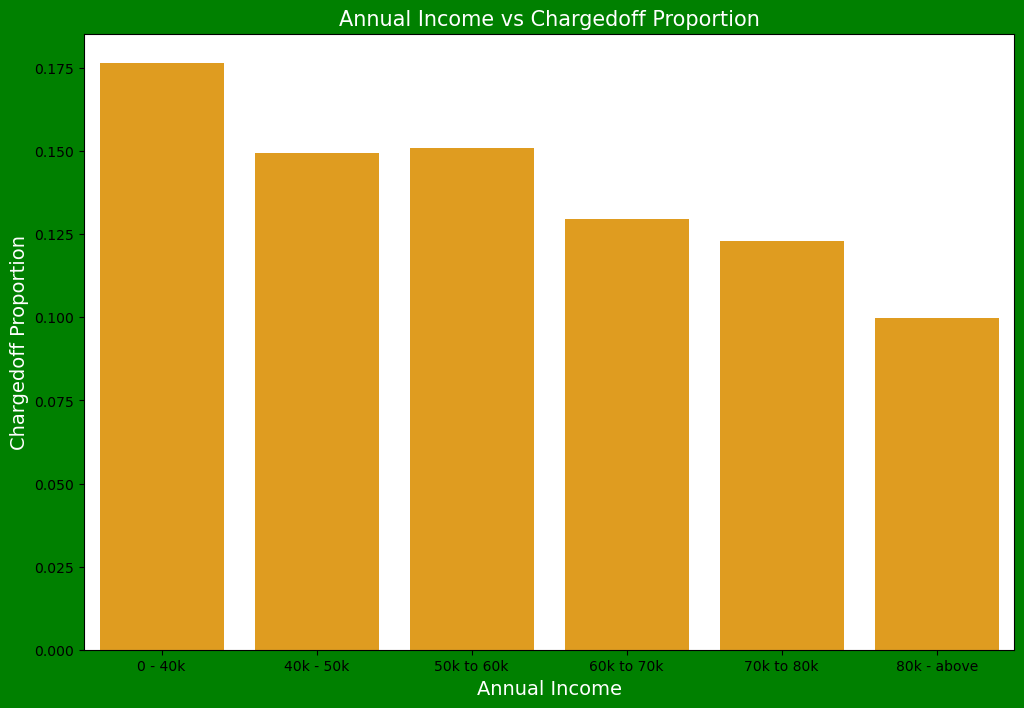

In [99]:
# Visualizing the relationship between Annual Income and Chargedoff Proportion using a bar plot

# Creating a figure and axis for the plot with a specific size and background color
fig, ax1 = plt.subplots(figsize = (12, 8), facecolor = 'g')

# Setting the title for the plot, adjusting font size and color
ax1.set_title('Annual Income vs Chargedoff Proportion', fontsize=15, color = 'w')

# Drawing the bar plot to show the Chargedoff Proportion against Annual Income bins
ax1 = sns.barplot(x = 'annual_inc_b', y = 'Chargedoff_Proportion', data = inc_range_vs_loan, color = 'orange')

# Setting the labels for the axes with specific font size and color for readability
ax1.set_ylabel('Chargedoff Proportion', fontsize = 14, color = 'w')
ax1.set_xlabel('Annual Income', fontsize = 14, color = 'w')

# Displaying the plot
plt.show()

#### Observations:
##### 1. The income range of 80k+ has lower chances of charge-off, indicating that higher-income individuals are less likely to default on their loans.
##### 2. The income range of 0-40k has higher chances of charge-off, suggesting that individuals in this income bracket are more prone to default on their loans.
##### 3. Overall, as the annual income increases, the charge-off proportion decreases, showing a negative correlation between income level and loan defaults.


In [101]:
# Bivariate Analysis on Interest Rate against Chargedoff Proportion

# Grouping the data by 'int_rate_b' (interest rate bins) and 'loan_status' (whether the loan was charged off or fully paid)
interest_vs_loan = df.groupby(['int_rate_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

# Adding a new column 'Total' which is the sum of 'Charged Off' and 'Fully Paid'
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Fully Paid']

# Calculating the Chargedoff Proportion by dividing the 'Charged Off' count by the 'Total'
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']

# Sorting the values based on the 'Chargedoff_Proportion' in descending order
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1670,4751,6421,0.260084
0,High,985,4851,5836,0.168780
2,Moderate,961,5638,6599,0.145628
1,Low,579,4983,5562,0.104099
4,Very Low,519,8254,8773,0.059159


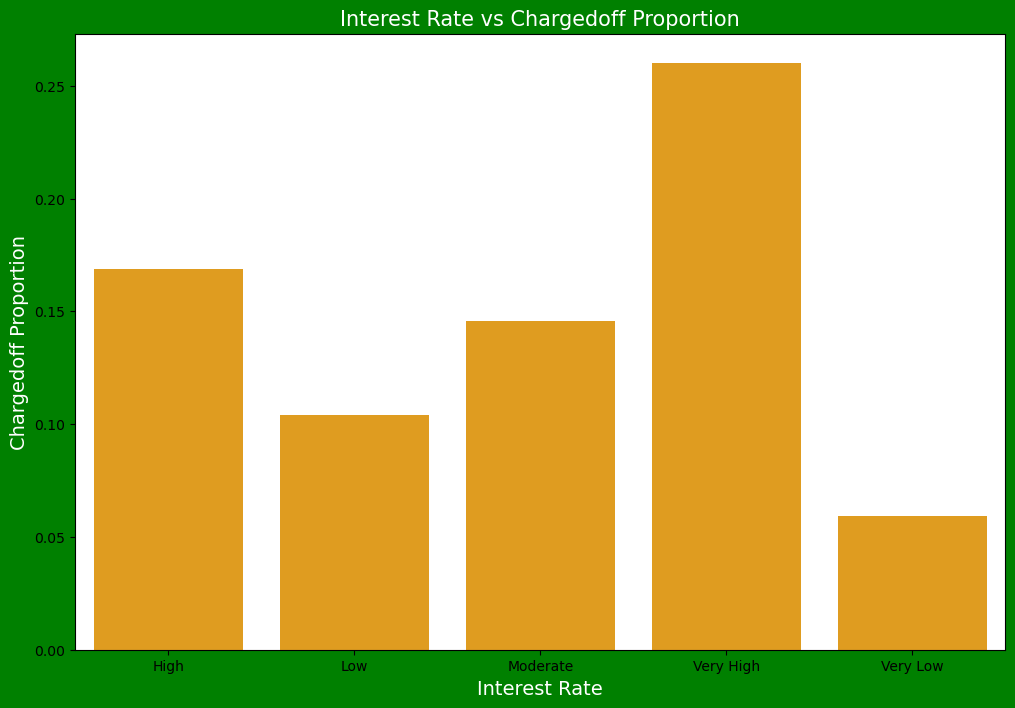

In [102]:
# Visualizing the relationship between Interest Rate and Chargedoff Proportion using a bar plot

# Creating a figure and axis for the plot with a specific size and background color
fig, ax1 = plt.subplots(figsize = (12, 8), facecolor = 'g')

# Setting the title for the plot, adjusting font size and color
ax1.set_title('Interest Rate vs Chargedoff Proportion', fontsize=15, color = 'w')

# Drawing the bar plot to show the Chargedoff Proportion against Interest Rate bins
ax1 = sns.barplot(x = 'int_rate_b', y = 'Chargedoff_Proportion', data = interest_vs_loan, color = 'orange')

# Setting the labels for the axes with specific font size and color for readability
ax1.set_xlabel('Interest Rate', fontsize = 14, color = 'w')
ax1.set_ylabel('Chargedoff Proportion', fontsize = 14, color = 'w')

# Displaying the plot
plt.show()


#### Observation:

##### 1. Loans with an interest rate of less than 10% (very low) have a significantly lower chance of being charged off, with the interest rates starting from a minimum of 5%.
##### 2. Loans with interest rates higher than 16% (very high) show a higher proportion of charged-off loans compared to the other categories.
##### 3. The charged-off proportion tends to increase as the interest rate rises, indicating a correlation between higher interest rates and higher loan defaults.

In [104]:
# Bivariate Analysis of Home Ownership against Chargedoff Proportion

# Grouping the data by 'home_ownership' and 'loan_status', 
# counting the number of loan statuses for each home ownership type
home_ownership_vs_loan = df.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

# Calculating the total number of loans for each home ownership type
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off'] + home_ownership_vs_loan['Fully Paid']

# Calculating the proportion of loans that were charged off for each home ownership type
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']

# Sorting the data by the 'Chargedoff_Proportion' in descending order to identify trends
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,OTHER,16,73,89,0.179775
3,RENT,2488,14156,16644,0.149483
2,OWN,355,2121,2476,0.143376
0,MORTGAGE,1855,12127,13982,0.132671


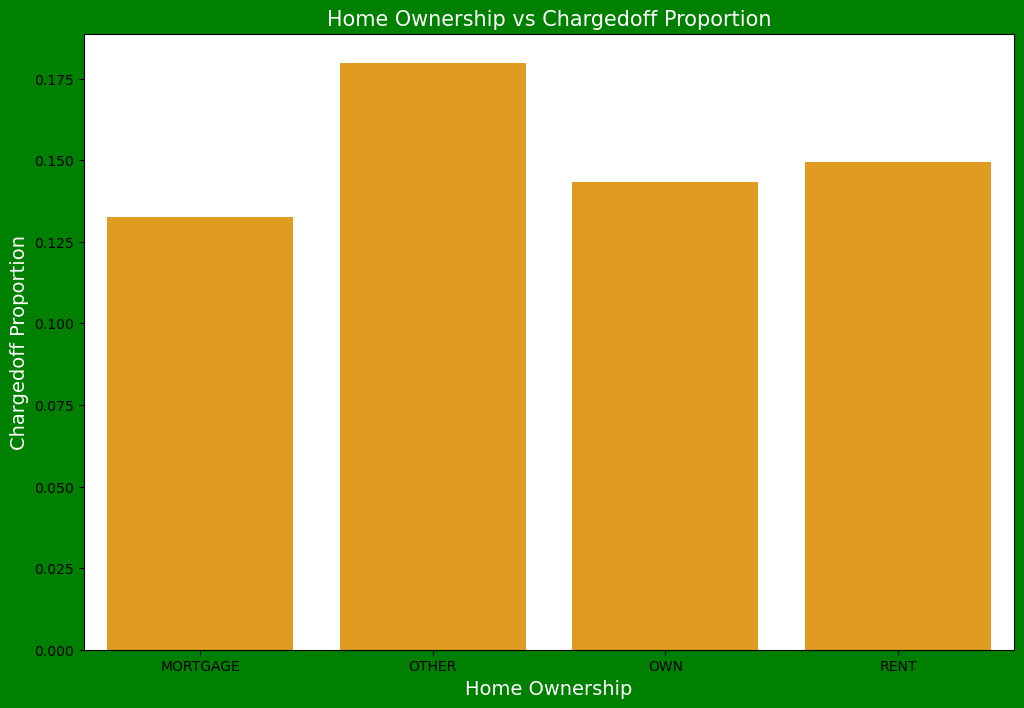

In [105]:
# Plotting the relationship between Home Ownership and Chargedoff Proportion

# Creating a figure and axis with a specified background color ('g' for green) and size
fig, ax1 = plt.subplots(figsize = (12, 8), facecolor = 'g')

# Setting the title for the bar plot with appropriate font size and color
ax1.set_title('Home Ownership vs Chargedoff Proportion', fontsize = 15, color = 'w')

# Plotting the bar plot with the color set to 'orange' to show the Chargedoff Proportion against Home Ownership categories
ax1 = sns.barplot(x = 'home_ownership', y = 'Chargedoff_Proportion', data = home_ownership_vs_loan, color = 'orange')

# Adding labels for the x-axis and y-axis with specific font size and color for better readability
ax1.set_xlabel('Home Ownership', fontsize = 14, color = 'w')
ax1.set_ylabel('Chargedoff Proportion', fontsize = 14, color = 'w')

# Displaying the plot
plt.show()

#### Observation:
##### 1. Individuals who do not own a home have a higher likelihood of loan defaults compared to those with home ownership.

In [107]:
# Performing Bivariate Analysis to explore the relationship between Loan Purpose and Charged-off Proportion

# Grouping the data by 'purpose' and 'loan_status' to count the occurrences of each loan status for each loan purpose
purpose_vs_loan = df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

# Calculating the total number of loans for each loan purpose (Charged Off + Fully Paid)
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Fully Paid']

# Calculating the Charged-off Proportion for each loan purpose
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']

# Sorting the values based on the Charged-off Proportion in descending order for better visualization
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,366,1003,1369,0.267348
10,renewable_energy,16,67,83,0.192771
5,house,49,249,298,0.164430
3,educational,46,235,281,0.163701
9,other,531,2823,3354,0.158318
7,medical,95,510,605,0.157025
8,moving,79,433,512,0.154297
2,debt_consolidation,2329,13253,15582,0.149467
12,vacation,49,281,330,0.148485
4,home_improvement,277,2026,2303,0.120278


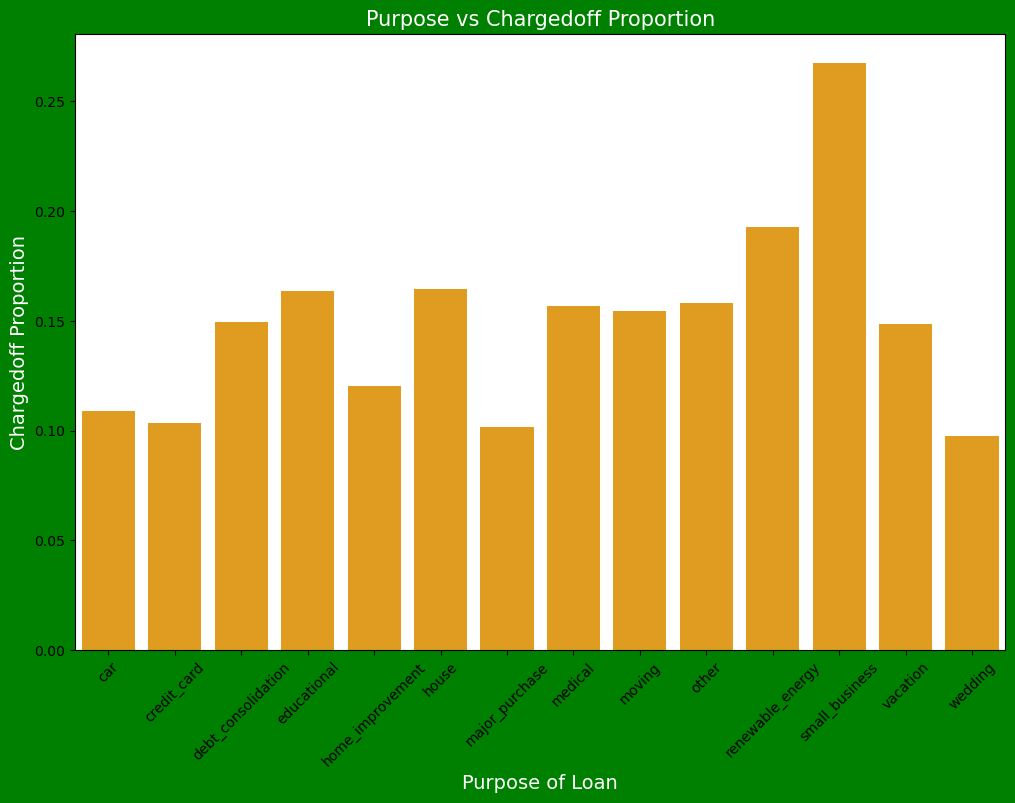

In [108]:
# Visualizing the relationship between Loan Purpose and Chargedoff Proportion using a bar plot

# Creating a figure and axis for the plot with a specified size and background color
fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='g')

# Setting the title for the plot with font size and color adjustments
ax1.set_title('Purpose vs Chargedoff Proportion', fontsize=15, color='w')

# Drawing the bar plot to show the Chargedoff Proportion against the loan purpose categories with orange bars
ax1 = sns.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_vs_loan, color='orange')

# Setting labels for the axes, adjusting font size and color for readability
ax1.set_xlabel('Purpose of Loan', fontsize=14, color='w')
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='w')

# Rotating the x-axis labels to make them more readable
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

#### Observations:

##### 1. Applicants who took loans for wedding purposes tend to have lower chances of loan defaults.
##### 2. Applicants who borrowed for small business purposes exhibit higher chances of loan defaults.

In [110]:
# Bivariate Analysis on DTI (Debt-to-Income Ratio) against Chargedoff_Proportion

# Grouping by DTI bins and loan status to count occurrences
dti_vs_loan = df.groupby(['dti_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

# Calculating the total number of loans for each DTI bin
dti_vs_loan['Total'] = dti_vs_loan['Charged Off'] + dti_vs_loan['Fully Paid']

# Calculating the Chargedoff Proportion for each DTI bin
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']

# Sorting the values to identify the DTI bins with the highest Chargedoff Proportion
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending = False)

loan_status,dti_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1044,5387,6431,0.162339
0,High,948,5111,6059,0.156461
2,Moderate,985,5785,6770,0.145495
1,Low,789,5339,6128,0.128753
4,Very Low,948,6855,7803,0.121492


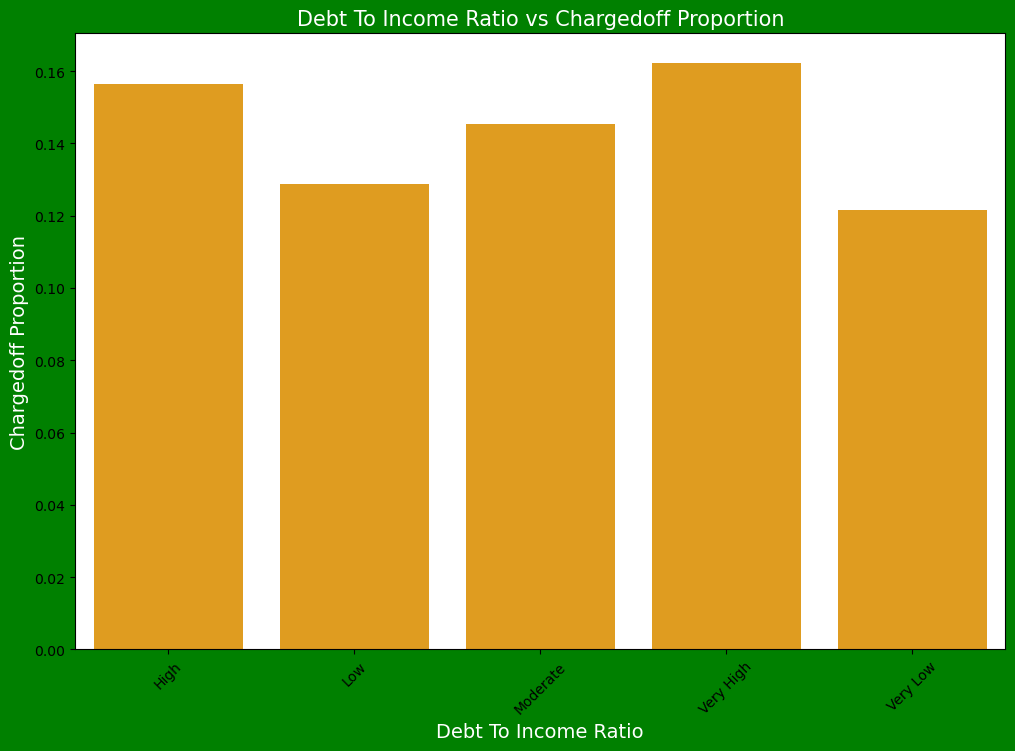

In [111]:
# Plotting the graph for Debt to Income Ratio vs Chargedoff Proportion

fig, ax1 = plt.subplots(figsize=(12, 8), facecolor = 'g')

# Setting the title for the plot
ax1.set_title('Debt To Income Ratio vs Chargedoff Proportion', fontsize = 15, color = 'w')

# Creating a bar plot to show the Chargedoff Proportion against Debt To Income Ratio
ax1 = sns.barplot(x = 'dti_b', y = 'Chargedoff_Proportion', data = dti_vs_loan, color = 'orange')

# Setting labels for the axes
ax1.set_xlabel('Debt To Income Ratio', fontsize = 14, color = 'w')
ax1.set_ylabel('Chargedoff Proportion', fontsize = 14, color = 'w')

# Adjusting the x-axis tick labels for readability
plt.xticks(rotation = 45)

# Displaying the plot
plt.show()

#### Observations:
##### 1. Higher Debt-to-Income (DTI) values are associated with a higher risk of loan defaults.
##### 2. Lower DTI values indicate a lower probability of loan defaults.

In [113]:
# Checking the frequency distribution of values in the 'pub_rec_bankruptcies' column
# This will help us understand how many applicants have bankruptcy records and the number of bankruptcies they have.
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    31741
1.0     1445
2.0        5
Name: count, dtype: int64

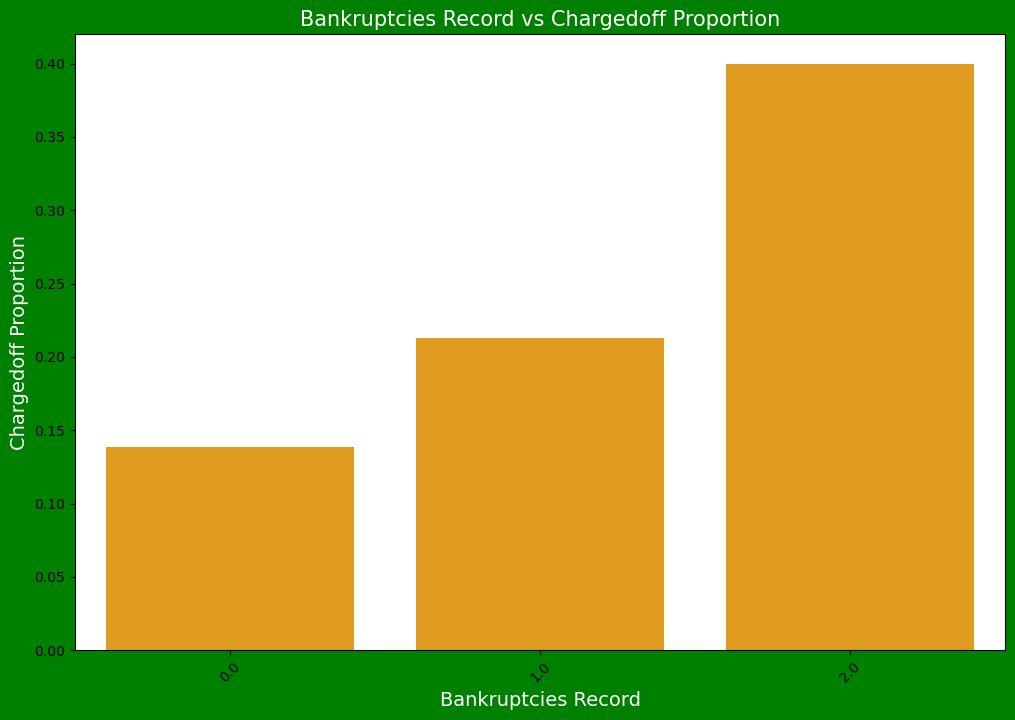

In [114]:
# Bivariate Analysis of Bankruptcy Records against Chargedoff Proportion

# Grouping the data by bankruptcy records and loan status, and counting the occurrences
pub_rec_bankruptcies_vs_loan = df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

# Adding a new column 'Total' that represents the total count of loan status for each bankruptcy category
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off'] + pub_rec_bankruptcies_vs_loan['Fully Paid']

# Calculating the Chargedoff proportion by dividing the 'Charged Off' by 'Total'
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']

# Sorting the data by the 'Chargedoff_Proportion' in descending order for better insight
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending = False)

# Plotting the results
# Creating the figure and axis for the plot
fig, ax1 = plt.subplots(figsize = (12, 8), facecolor = 'g')

# Setting the title for the plot and adjusting font size and color
ax1.set_title('Bankruptcies Record vs Chargedoff Proportion', fontsize = 15, color = 'w')

# Plotting a bar plot of bankruptcy records vs charged off proportion
ax1 = sns.barplot(x = 'pub_rec_bankruptcies', y = 'Chargedoff_Proportion', data = pub_rec_bankruptcies_vs_loan, color = 'orange')

# Setting the labels for the axes, including font size and color for readability
ax1.set_xlabel('Bankruptcies Record', fontsize = 14, color = 'w')
ax1.set_ylabel('Chargedoff Proportion', fontsize = 14, color = 'w')

# Rotating x-ticks for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

#### Observations:
##### 1. Loan defaults are significantly higher among applicants with 2 bankruptcy records.
##### 2. Applicants with no bankruptcy records (0) have a much lower risk of defaulting on their loans.
##### 3. Generally, the fewer bankruptcy records an applicant has, the lower the risk of default.

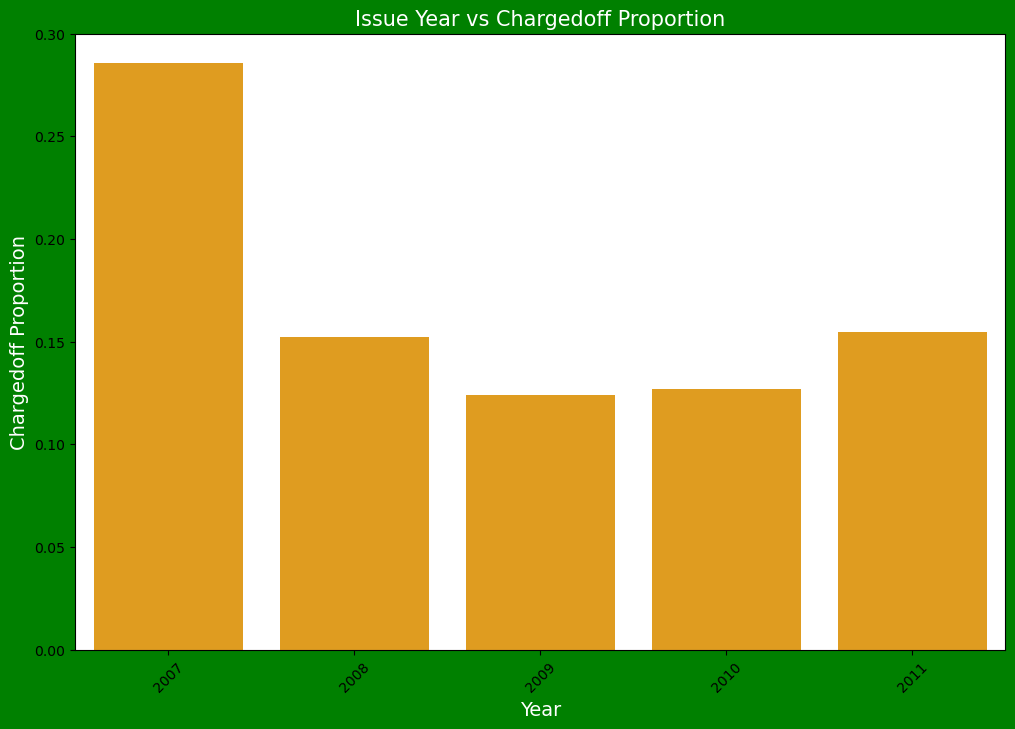

In [116]:
# Bivariate Analysis on Issue Year against Chargedoff Proportion

# Grouping data by 'issue_year' and 'loan_status', counting the number of loan statuses
issue_year_vs_loan = df.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

# Calculating the total number of loans for each issue year
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off'] + issue_year_vs_loan['Fully Paid']

# Calculating the proportion of Charged Off loans for each issue year
issue_year_vs_loan['Chargedoff_Proportion'] = issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']

# Sorting the data by Chargedoff Proportion in descending order
issue_year_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Plotting the Graph

# Creating a figure and axis with a specific size and background color
fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='g')

# Setting the title of the plot
ax1.set_title('Issue Year vs Chargedoff Proportion', fontsize=15, color='w')

# Drawing the bar plot to show the Chargedoff Proportion by issue year
ax1 = sns.barplot(x='issue_year', y='Chargedoff_Proportion', data=issue_year_vs_loan, color = 'orange')

# Setting the x and y axis labels with specific font size and color
ax1.set_xlabel('Year', fontsize=14, color='w')
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='w')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

#### Observations:

##### 1. Year 2007 has the highest proportion of loan defaults, indicating a higher risk of charge-offs in that year.
##### 2. Year 2009 shows the lowest proportion of loan defaults, indicating a relatively better repayment behavior for loans issued that year.

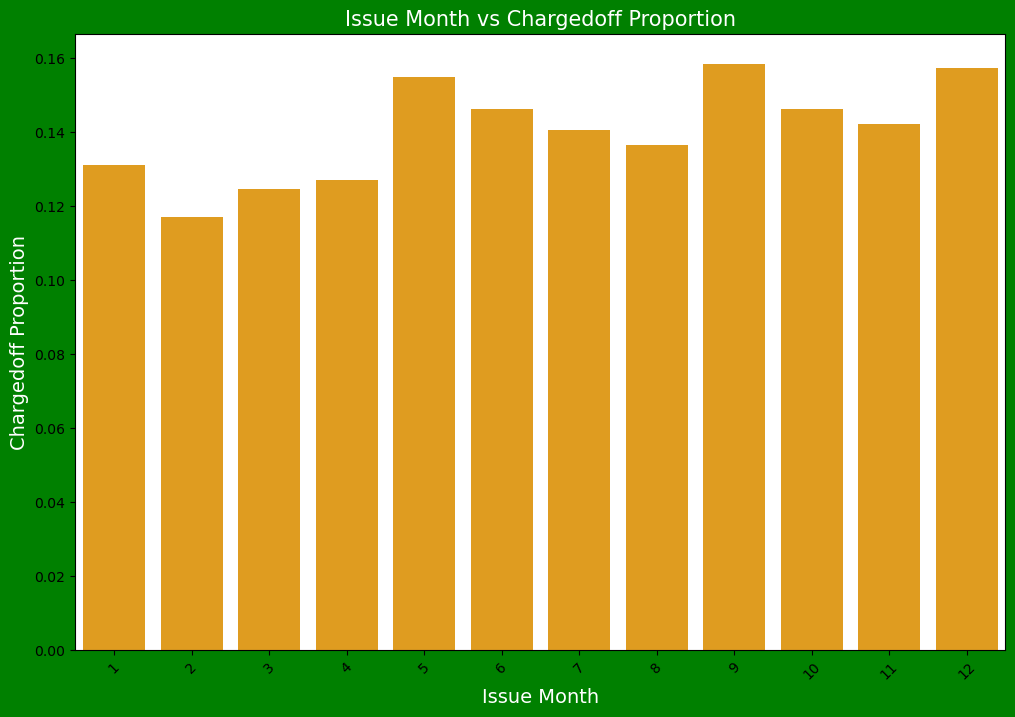

In [118]:
# Bivariate Analysis on Month of Issue of Loan Record against Chargedoff_Proportion

# Grouping the data by 'issue_month' and 'loan_status' to calculate the count of loan statuses
# Unstacking to separate the loan statuses into columns (Charged Off, Fully Paid)
# Filling missing values with 0 to ensure smooth calculations
# Resetting the index to have a clean DataFrame structure
issue_month_vs_loan = df.groupby(['issue_month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

# Calculating the total number of loans per month (Charged Off + Fully Paid)
issue_month_vs_loan['Total'] = issue_month_vs_loan['Charged Off'] + issue_month_vs_loan['Fully Paid']

# Calculating the Chargedoff Proportion (Charged Off loans divided by Total loans)
issue_month_vs_loan['Chargedoff_Proportion'] = issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']

# Sorting the values in descending order to observe the months with the highest Chargedoff Proportion
issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending = False)

# Plotting the graph

# Creating the plot with a figure size of 12x8 and background color as 'g' (green)
fig, ax1 = plt.subplots(figsize = (12, 8), facecolor = 'g')

# Setting the title of the plot with the desired font size and color (white)
ax1.set_title('Issue Month vs Chargedoff Proportion', fontsize = 15, color = 'w')

# Creating a barplot to display the Chargedoff Proportion for each issue month
ax1 = sns.barplot(x = 'issue_month', y = 'Chargedoff_Proportion', data = issue_month_vs_loan, color='orange')

# Setting labels for the X and Y axes with appropriate font sizes and colors (white)
ax1.set_xlabel('Issue Month', fontsize = 14, color = 'w')
ax1.set_ylabel('Chargedoff Proportion', fontsize = 14, color = 'w')

# Rotating the x-axis labels to make them more readable (45 degrees)
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

#### Observations:
##### 1. Loans issued in May, September, and December exhibit a higher number of loan defaults.
##### 2. February is another month with a significant number of loan defaults.
##### 3. A substantial portion of loan defaults originates from loans approved between September and December.

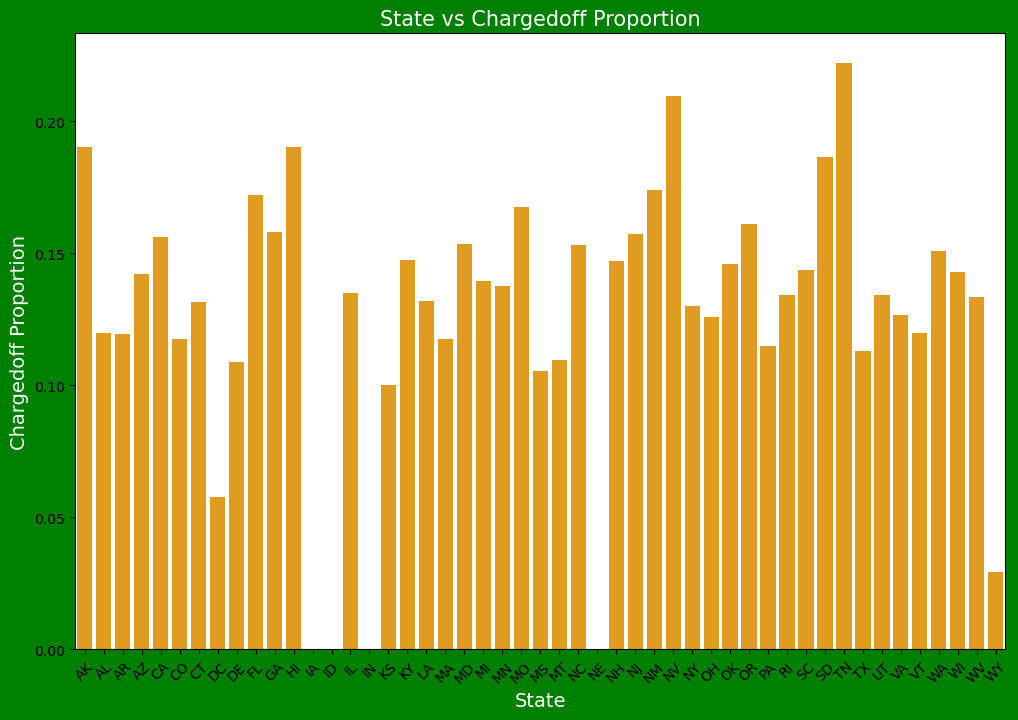

In [120]:
# Bivariate Analysis on Address State against Chargedoff Proportion

# Grouping data by 'addr_state' and 'loan_status' to calculate counts of charged off and fully paid loans
addr_state_vs_loan = df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

# Calculating the total loans in each state (Charged Off + Fully Paid)
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off'] + addr_state_vs_loan['Fully Paid']

# Calculating the proportion of charged off loans for each state
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']

# Sorting values based on the 'Chargedoff_Proportion' in descending order for better visualization
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Plotting the Graph
fig, ax1 = plt.subplots(figsize = (12, 8), facecolor = 'g')

# Setting the title of the plot
ax1.set_title('State vs Chargedoff Proportion', fontsize = 15, color = 'w')

# Creating a bar plot to visualize Chargedoff Proportion vs States
ax1 = sns.barplot(x = 'addr_state', y = 'Chargedoff_Proportion', data = addr_state_vs_loan, color='orange')

# Adding labels to the axes with proper font sizes and colors
ax1.set_xlabel('State', fontsize = 14, color = 'w')
ax1.set_ylabel('Chargedoff Proportion', fontsize = 14, color = 'w')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

#### Observations:
##### 1. DE States have the highest number of loan defaults.
##### 2. CA (California) has the lowest number of loan defaults.

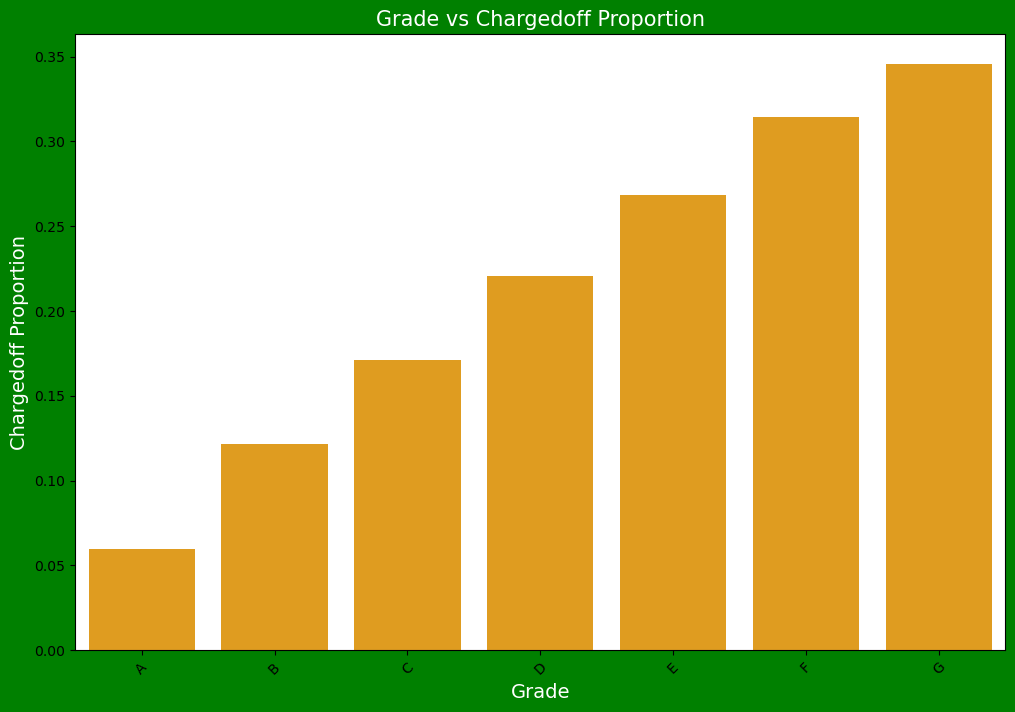

In [122]:
# Bivariate Analysis on Loan Grade against Chargedoff Proportion

# Grouping the data by 'grade' and 'loan_status', and counting the number of loans in each category (Charged Off and Fully Paid)
grade_vs_loan = df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

# Calculating the total number of loans per grade (sum of Charged Off and Fully Paid loans)
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid']

# Calculating the proportion of Charged Off loans per grade
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']

# Sorting the values based on Chargedoff Proportion in descending order to identify which grades have higher default rates
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Plotting the Graph

# Creating a figure and axis with a specified size and background color
fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='g')

# Setting the title of the plot with specific font size and color
ax1.set_title('Grade vs Chargedoff Proportion', fontsize=15, color='w')

# Plotting the bar plot with x as 'grade' and y as 'Chargedoff Proportion' from the 'grade_vs_loan' DataFrame
ax1 = sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan, color = 'orange')

# Labeling the x-axis (Grade) and y-axis (Chargedoff Proportion) with specific font size and color
ax1.set_xlabel('Grade', fontsize=14, color='w')
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='w')

# Rotating the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

#### Observations:
##### 1. Loan applicants with Grade G have the highest proportion of loan defaults (charged-off loans).
##### 2. Loan applicants with Grade A exhibit the lowest proportion of loan defaults, indicating better loan repayment rates in this group.

### 7. CORRELATION ANALYSIS

In [125]:
# Checking the data types of each column in the DataFrame
# This will display the data type of every column, helping to verify if they are of the expected type (e.g., integer, float, object, etc.)

df.dtypes

id                               int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
pub_rec_bankruptcies           float64
issue_year                       int32
issue_month                      int32
loan_amnt_b                     object
annual_inc_b                    object
int_rate_b                      object
dti_b                           object
dtype: object

In [126]:
# Extracting non-object columns for analysis
# This will select all columns from the DataFrame that are not of type 'object' (strings or categorical data) and not of type 'datetime64'.
# The result is a list of column names that are numeric or other non-object types, which are typically used for quantitative analysis.

non_obj_columns = df.loc[:, (df.dtypes != object) & (df.dtypes != "datetime64[ns]")].columns.tolist()

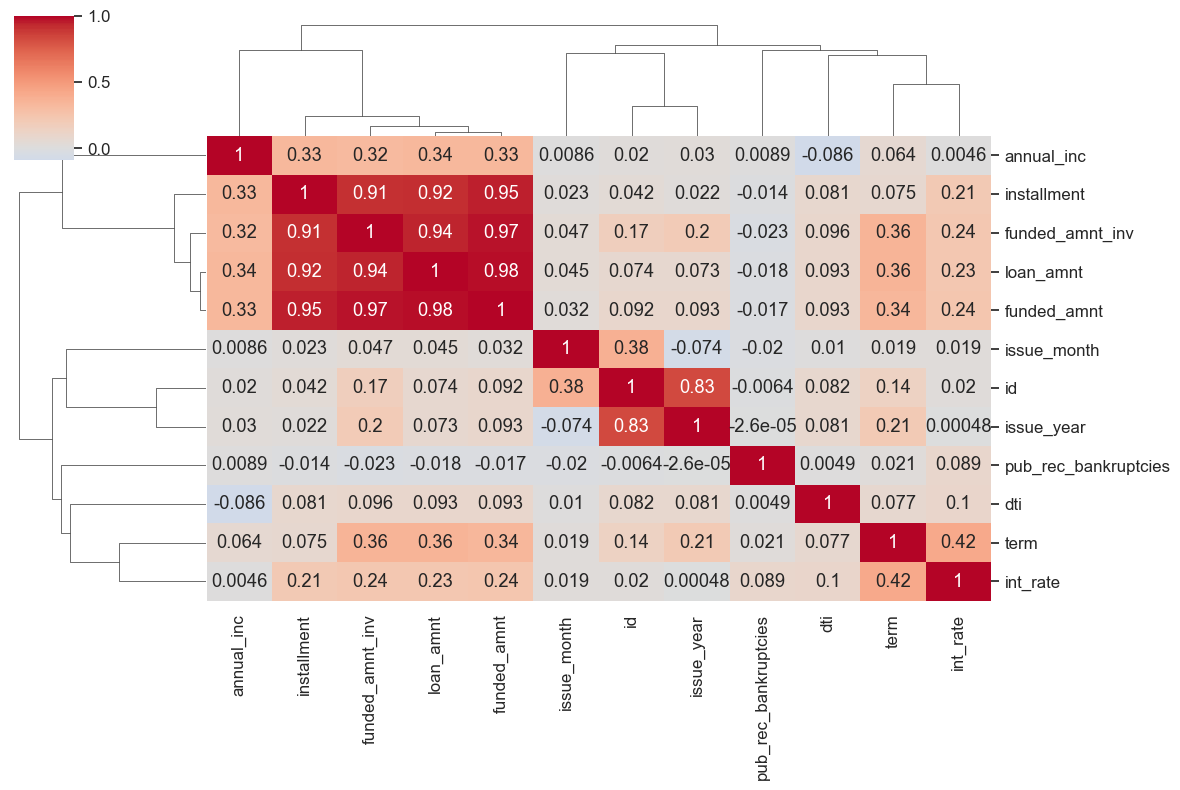

In [127]:
# Plotting the cluster map for better understanding of correlations
# First, we select the non-object columns, which are assumed to be numeric.
# Then we calculate the correlation matrix of these columns using .corr().
# The heatmap will help visualize the relationships between different numeric columns.

corr_df = df[non_obj_columns]  # Select the non-object columns for correlation analysis

# Compute the correlation matrix for the selected columns
corr = corr_df.corr()

# Set the font scale for better readability of annotations on the plot
sns.set(font_scale = 1.1)

# Create the cluster map to visualize correlations between the numeric columns
# annot=True adds correlation values to the heatmap, figsize=(12,8) sets the plot size
# We use the 'coolwarm' color palette for a better gradient representation
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="coolwarm", center=0)

# Display the plot
plt.show()

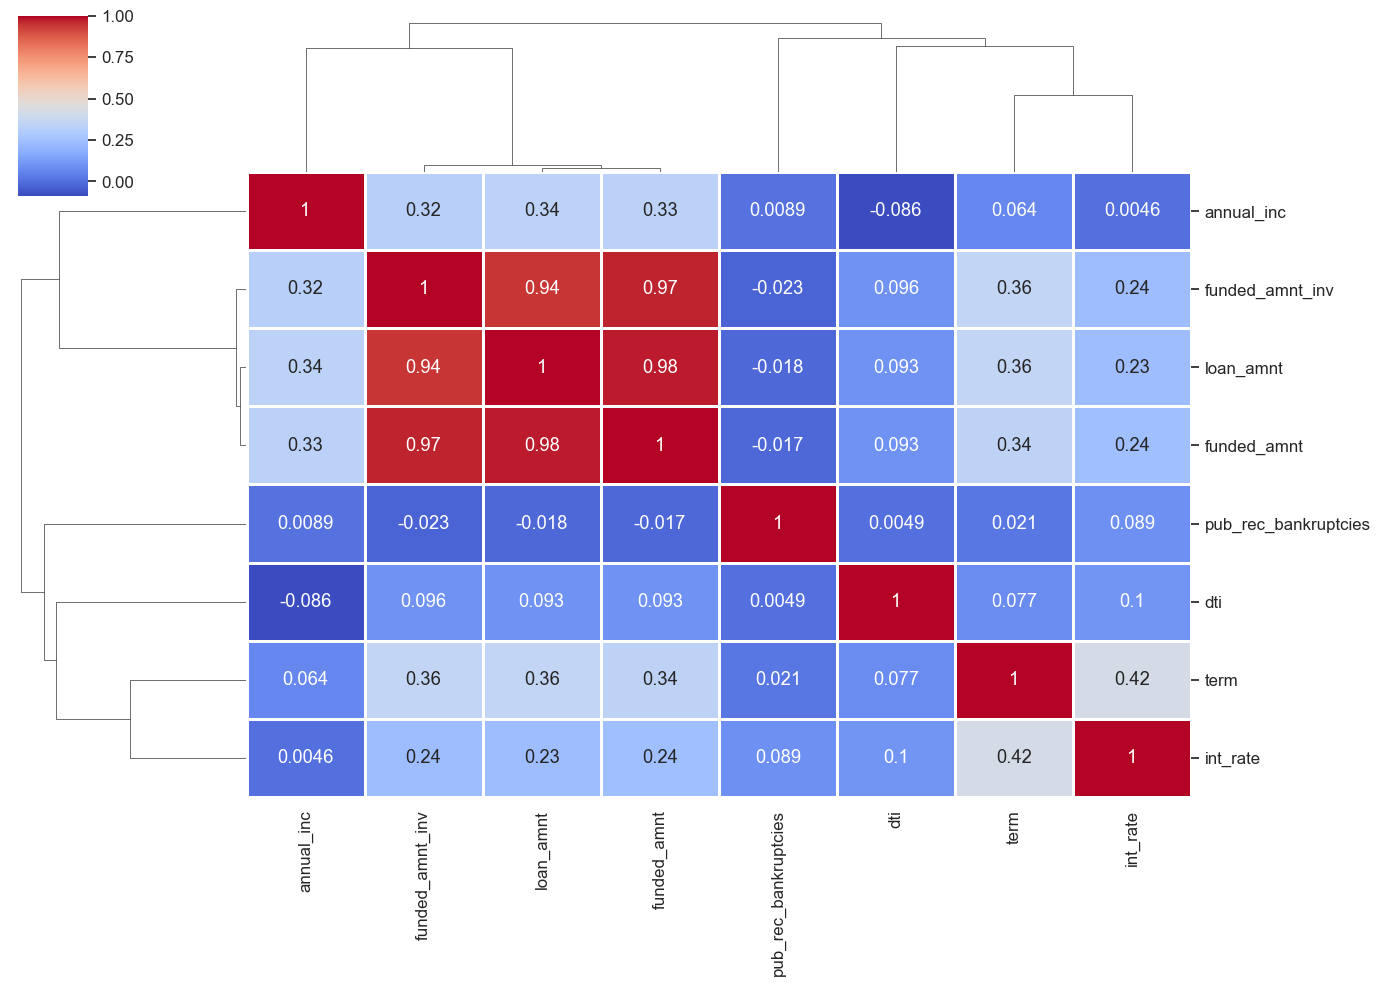

In [128]:
# Removing specific columns that are not needed for the correlation analysis
# 'id', 'issue_month', 'issue_year', 'installment' columns are removed as they are not relevant for clustering

unwanted_columns_for_cluster = ['id', 'issue_month', 'issue_year', 'installment']

# Drop the unwanted columns from the correlation dataframe
corr_df = corr_df.drop(columns = unwanted_columns_for_cluster)

# Compute the updated correlation matrix
corr = corr_df.corr()

# Set the font scale for better readability of annotations
sns.set(font_scale = 1.1)

# Plot the cluster map with updated data (after dropping unwanted columns)
# Apply a color palette that includes better contrast and visibility for the cluster map
sns.clustermap(corr, annot=True, figsize=(14, 10), cmap="coolwarm", linewidths=1, cbar_pos=(0.02, 0.8, 0.05, 0.18))

# Display the plot
plt.show()

#### Negative Correlations:
##### 1. Loan Amount and Bankruptcies: Higher bankruptcies are associated with lower loan amounts.
##### 2. Annual Income and Debt-to-Income Ratio: Higher income leads to a lower debt-to-income ratio.

#### Strong Positive Correlations:
##### 1. Loan Term and Loan Amount: Longer loan terms are linked to higher loan amounts.
##### 2. Loan Term and Interest Rate: Longer terms are associated with higher interest rates.
##### 3. Annual Income and Loan Amount: Higher income corresponds to larger loan amounts.

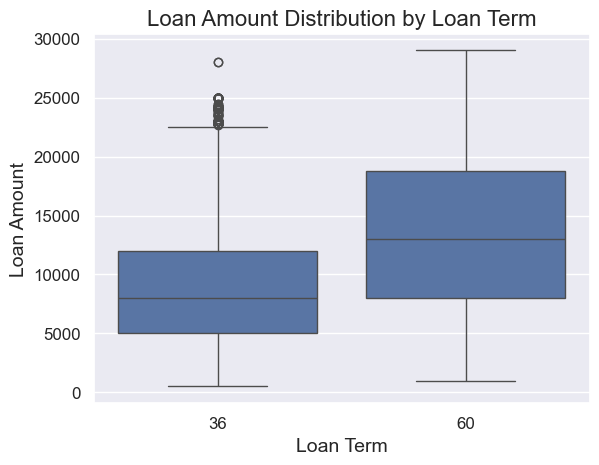

In [130]:
# Plotting the Boxplot for Loan Amount Distribution across Loan Terms

# Creating the boxplot to visualize the distribution of loan amounts ('loan_amnt')
# across different loan terms ('term').
sns.boxplot(x='term', y='loan_amnt', data=corr_df)

# Setting the title and labels for better understanding
plt.title('Loan Amount Distribution by Loan Term', fontsize=16)
plt.xlabel('Loan Term', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)

# Displaying the plot
plt.show()

#### Observation: 
##### From the above graph, it is evident that as the loan term increases, the loan amount also tends to increase. This suggests a direct relationship between the length of the loan term and the size of the loan amount, with longer terms generally associated with larger loans.

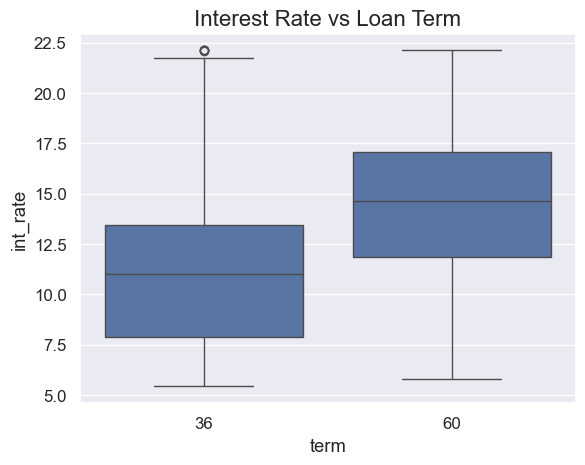

In [132]:
# Boxplot to visualize the distribution of interest rates across different loan terms
sns.boxplot(x = 'term', y = 'int_rate', data = corr_df)

# Adding a title to the plot to describe the relationship being visualized
plt.title('Interest Rate vs Loan Term', fontsize = 16)

# Displaying the plot to visualize the data
plt.show()